Se descargan las librerias 

In [1]:
import numpy as np

In [2]:
import pandas as pd

C:\Users\HP\AppData\Local\Temp\ipykernel_63280\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
import matplotlib.ticker as ticker

Primer avance

In [ ]:
#Se carga el archivo principal
#data_paises = pd.read_csv('data_latinoamerica.csv')

In [7]:
#se seleccionan los paises de la consigna
paises_filtrados = ['Argentina', 'Brazil', 'Colombia', 'Chile', 'Mexico' ,'Peru'] 

In [ ]:
#Se filtran los paises del dataset
#paises = data_paises[data_paises['country name'].isin(paises_filtrados)]


In [ ]:
#se agrega un filtro adiiconal para asegurar que estan los paises de la consigna
paises = paises[paises['location_key'].isin(['AR', 'BR' ,'CL','CO','MX', 'PE'])]

In [ ]:
#se agrega otro filtro para selecciona las fechas de la consigna
paises= data_paises[data_paises['date']> '2021-01-01']

In [11]:
#Se revisa que paises han quedado despues de los principales filtros de la consigna
paises.shape

(3744, 50)

In [ ]:
#Se guarda el dataset ya filtrado en un archivo nuevo para su facilidad de manipulacion
paises.to_csv('file.csv', index=False)

In [35]:
#Se carga el archivo con los paises y fechas filtradas
paises = pd.read_csv('file.csv')

In [13]:
paises.head()

location_key        date country_code country_name  new_confirmed  \
0           AR  2021-01-02           AR    Argentina         7767.0   
1           AR  2021-01-03           AR    Argentina         4934.0   
2           AR  2021-01-04           AR    Argentina        13953.0   
3           AR  2021-01-05           AR    Argentina        14085.0   
4           AR  2021-01-06           AR    Argentina        14496.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0         166.0             1670634.0              46688.0   
1         157.0             1675568.0              46845.0   
2         157.0             1689521.0              47002.0   
3         160.0             1703606.0              47162.0   
4         131.0             1718102.0              47293.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                20334.0  44938712.0  ...   
1                                20529.0  44938712.0  ...   
2                                25164.0  44938712.0  ...   
3                                29852.0  44938712.0  ...   
4                                34162.0  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            NaN   
1                      26.6                        15.8            NaN   
2                      26.6                        15.8            NaN   
3                      26.6                        15.8            NaN   
4                      26.6                        15.8            NaN   

   cumulative_recovered  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 50 columns]

In [6]:
paises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3744 non-null   object 
 1   date                                   3744 non-null   object 
 2   country_code                           3744 non-null   object 
 3   country_name                           3744 non-null   object 
 4   new_confirmed                          3744 non-null   float64
 5   new_deceased                           3744 non-null   float64
 6   cumulative_confirmed                   3744 non-null   float64
 7   cumulative_deceased                    3744 non-null   float64
 8   cumulative_vaccine_doses_administered  3744 non-null   float64
 9   population                             3744 non-null   float64
 10  population_male                        3744 non-null   float64
 11  popu

In [36]:
#se crea un mscara para conocer las columnas que tienen valores faltantes
valores_nulos = paises.isnull().sum()[paises.isnull().sum()>0]
valores_nulos

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64

In [15]:
valores_nulos.index

Index(['new_confirmed', 'new_deceased', 'cumulative_confirmed',
       'cumulative_deceased', 'cumulative_vaccine_doses_administered',
       'average_temperature_celsius', 'minimum_temperature_celsius',
       'maximum_temperature_celsius', 'rainfall_mm', 'relative_humidity',
       'new_recovered', 'cumulative_recovered'],
      dtype='object')

In [16]:
#Para conocer las columnas con valores negativos 

negativos_new_recovered = (paises['new_recovered'] < 0).sum()
negativos_new_confirmed = (paises['new_confirmed'] < 0).sum()

print(f"Cantidad de valores negativos en columna 'new_recovered': {negativos_new_recovered}")
print(f"Cantidad de valores negativos en  columna'new_confirmed': {negativos_new_confirmed}")

Cantidad de valores negativos en columna 'new_recovered': 12
Cantidad de valores negativos en  columna'new_confirmed': 1


In [22]:
#Recordar los paises de la consigna
paises_filtrados = ['Argentina', 'Brazil', 'Colombia', 'Chile', 'Mexico' ,'Peru'] 

In [ ]:
#Se usa un ciclo for que recorre la lista de los paises enlistados, "paises_filtrados", a su vez el cuerpo del bucle son las columnas especificas de dataset
# general que se sabe que tienen valores faltantes y se usa el metodo .fillna para reemplazar el valor faltante con el promedio especifico de su respecttiva
# columna y que corresponda al nombre del pais repectivo que esta en filas

# se usa el promedio para reemplazar los valores faltantes porque dentro de la distribucion de la campana la mayor parte de los valores estan dentro del
# promedio o de una desviacion estandar arriba o abajo y cuya probabilidad de que asi sea es amplia, y asi no se alteran los datos de forma importante

for pais in paises_filtrados:
    paises['new_deceased'] = paises['new_deceased'].fillna(paises[paises['country_name']== pais]['new_deceased'].mean())
    paises['average_temperature_celsius'] = paises['average_temperature_celsius'].fillna(paises[paises['country_name']== pais]['average_temperature_celsius'].mean())
    paises['minimum_temperature_celsius'] = paises['minimum_temperature_celsius'].fillna(paises[paises['country_name']== pais]['minimum_temperature_celsius'].mean())
    paises['cumulative_recovered'] = paises['cumulative_recovered'].fillna(paises[paises['country_name']== pais]['cumulative_recovered'].mean())
    paises['maximum_temperature_celsius'] = paises['maximum_temperature_celsius'].fillna(paises[paises['country_name']== pais]['maximum_temperature_celsius'].mean())
    paises['rainfall_mm'] = paises['rainfall_mm'].fillna(paises[paises['country_name']== pais]['rainfall_mm'].mean())
    paises['relative_humidity'] = paises['relative_humidity'].fillna(paises[paises['country_name']== pais]['relative_humidity'].mean())
    
#se reemplazan los valores faltantes solo con Los acumulados fueron rellenados con el valor anterior o posterior porque son cifras acumuladas de un todo
# Al no tener certeza de los valores en cifras acumuladas es mejor usar valores cercanos en la filas respectivas para no alterar de forma importante

    paises['cumulative_confirmed'] = paises['cumulative_confirmed'].fillna(paises[paises['country_name']== pais]['cumulative_confirmed'].ffill().bfill())
    paises['cumulative_deceased'] = paises['cumulative_deceased'].fillna(paises[paises['country_name']== pais]['cumulative_deceased'].ffill().bfill())
    paises['cumulative_vaccine_doses_administered'] = paises['cumulative_vaccine_doses_administered'].fillna(paises[paises['country_name']== pais]['cumulative_vaccine_doses_administered'].ffill().bfill())

#se reemplazan los valores faltantes solo con ceros de la columna "new recovered"porque son cifras de pacientes recuperados. Al no tener certeza 
# de los valores es mejor usar ceros que promedios para no alterar de forma importante
    paises['new_recovered'] = paises['new_recovered'].fillna(0)
    paises['new_confirmed'] = paises['new_confirmed'].fillna(0)

In [47]:
#se revisa que los valores faltantes hayan sido corregidos y que ya no existan
valores_nulos = paises.isnull().sum()[paises.isnull().sum()>0]
valores_nulos

Series([], dtype: int64)

In [48]:
print(paises.isnull().sum())

location_key                             0
date                                     0
country_code                             0
country_name                             0
new_confirmed                            0
new_deceased                             0
cumulative_confirmed                     0
cumulative_deceased                      0
cumulative_vaccine_doses_administered    0
population                               0
population_male                          0
population_female                        0
population_rural                         0
population_urban                         0
population_density                       0
human_development_index                  0
population_age_00_09                     0
population_age_10_19                     0
population_age_20_29                     0
population_age_30_39                     0
population_age_40_49                     0
population_age_50_59                     0
population_age_60_69                     0
population_

In [54]:
#Para conocer las columnas con valores negativos 

negativos_new_recovered = (paises['new_recovered'] < 0).sum()
negativos_new_confirmed = (paises['new_confirmed'] < 0).sum()

print(f"Cantidad de valores negativos en columna 'new_recovered': {negativos_new_recovered}")
print(f"Cantidad de valores negativos en  columna'new_confirmed': {negativos_new_confirmed}")

Cantidad de valores negativos en columna 'new_recovered': 12
Cantidad de valores negativos en  columna'new_confirmed': 1


In [58]:
# Con funciones lambda se reemplazan valores negativos de las columnas
paises['new_confirmed'] = paises['new_confirmed'].apply(lambda x: max(x, 0))
paises['new_recovered'] = paises['new_recovered'].apply(lambda x: max(x, 0))

In [57]:
#Para comprobar que cambiaron los numeros negativos 

negativos_new_recovered = (paises['new_recovered'] < 0).sum()
negativos_new_confirmed = (paises['new_confirmed'] < 0).sum()

print(f"Cantidad de valores negativos en la columna 'new_recovered': {negativos_new_recovered}")
print(f"Cantidad de valores negativos en la columna'new_confirmed': {negativos_new_confirmed}")

Cantidad de valores negativos en la columna 'new_recovered': 0
Cantidad de valores negativos en la columna'new_confirmed': 0


In [ ]:
#se almacena el dataset con los valores faltantes ya reemplazados
paises.to_csv('paises_lat.csv', index=False)

In [7]:
#se carga el dataset mas reciente
paises = pd.read_csv('paises_lat.csv',sep=',')

In [66]:
paises.head()

location_key        date country_code country_name  new_confirmed  \
0           AR  2021-01-02           AR    Argentina         7767.0   
1           AR  2021-01-03           AR    Argentina         4934.0   
2           AR  2021-01-04           AR    Argentina        13953.0   
3           AR  2021-01-05           AR    Argentina        14085.0   
4           AR  2021-01-06           AR    Argentina        14496.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0         166.0             1670634.0              46688.0   
1         157.0             1675568.0              46845.0   
2         157.0             1689521.0              47002.0   
3         160.0             1703606.0              47162.0   
4         131.0             1718102.0              47293.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                20334.0  44938712.0  ...   
1                                20529.0  44938712.0  ...   
2                                25164.0  44938712.0  ...   
3                                29852.0  44938712.0  ...   
4                                34162.0  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            0.0   
1                      26.6                        15.8            0.0   
2                      26.6                        15.8            0.0   
3                      26.6                        15.8            0.0   
4                      26.6                        15.8            0.0   

   cumulative_recovered  
0          2.124070e+07  
1          2.124070e+07  
2          2.124070e+07  
3          2.124070e+07  
4          2.124070e+07  

[5 rows x 50 columns]

Segundo avance

In [69]:
for i in paises.columns:
    print(i)
    print(paises[i].describe())
    print('**********************')

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
**********************
date
count           3744
unique           624
top       2021-01-02
freq               6
Name: date, dtype: object
**********************
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
**********************
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
**********************
new_confirmed
count      3744.000000
mean      13858.264423
std       24227.711725
min           0.000000
25%        1510.250000
50%        5112.500000
75%       14812.750000
max      298408.000000
Name: new_confirmed, dtype: float64
**********************
new_deceased
count     3744.000000
mean       276.363237
std        507.133193
min          0.000000
25%         26.000000
50%        101.000000
75%        311.000000
max      11447.000000
Name: 

In [73]:
#Se crea una funcion que se ingresa el dataset. Tiene un ciclo for que recorre las columnas. De cada columna se calculan con diversos metodos y extrae medidas
# de tendencia central como media, mediana, moda, rango, varianza y desviacion estandar y se almacenan en un diccionario vacio. El nombre de la medida es la 
# clave y los valores es la mdida en si, y retorna ese diccionario con las medidas recabadas. 


def estadisticas_datos(datos):

    medidas = {}
    
    for columna in datos.columns:
        if datos[columna].dtype in ['float64', 'int64']:
            media = datos[columna].mean()
            mediana = datos[columna].median()
            moda = datos[columna].mode().iloc[0] if not datos[columna].mode().empty else None
            rango = datos[columna].max() - datos[columna].min()
            varianza = datos[columna].var()
            desviacion_estandar = datos[columna].std()

            medidas[columna] = {
                'Media': media,
                'Mediana': mediana,
                'Moda': moda,
                'Rango': rango,
                'Varianza': varianza,
                'Desviación Estándar': desviacion_estandar
            }
    
    return medidas

#Se llama a la funcion creada y se almacena en una variable. Se recorre con un bucle for atraves de los valores y claves del diccionario para poder imprimirlos

estadisticas = estadisticas_datos(paises)

for columna, medida in estadisticas.items():

    print(f"columna: {columna}")
    for nombre, valor in medida.items():
        print(f"{nombre}: {valor}")
    print('**************************')

columna: new_confirmed
Media: 13858.264423076924
Mediana: 5112.5
Moda: 0.0
Rango: 298408.0
Varianza: 586982015.4347371
Desviación Estándar: 24227.7117251039
**************************
columna: new_deceased
Media: 276.3632370933278
Mediana: 101.0
Moda: 0.0
Rango: 11447.0
Varianza: 257184.0754690855
Desviación Estándar: 507.13319302633454
**************************
columna: cumulative_confirmed
Media: 6793568.582264957
Mediana: 3643377.0
Moda: 6304317.0
Rango: 34567862.0
Varianza: 64081091330927.14
Desviación Estándar: 8005066.603778331
**************************
columna: cumulative_deceased
Media: 193024.7702991453
Mediana: 139628.5
Moda: 141708.0
Rango: 685202.0
Varianza: 33487916463.656017
Desviación Estándar: 182997.03949423885
**************************
columna: cumulative_vaccine_doses_administered
Media: 80828060.03819445
Mediana: 47784908.0
Moda: 209673612.0
Rango: 347868463.0
Varianza: 8751364136884599.0
Desviación Estándar: 93548726.00353572
**************************
columna: 

In [8]:
#Se preparan y ordenan los datos para poder usarlos en las graficas 

#Las fechas deben estar en formato fecha
paises['date'] = pd.to_datetime(paises['date'])
print(paises['date'].dtype)

datetime64[ns]


In [8]:
#Se ordena el dataFrame por país y fecha al principio
paises_ordenados = paises.sort_values(by=['country_name', 'date'])

#Se establece la columna 'date' como índice
paises_ordenados.set_index('date', inplace=True)

print(paises_ordenados.head())

           location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   

            cumulative_va

Gráficos de barras de países contra el resto de variables

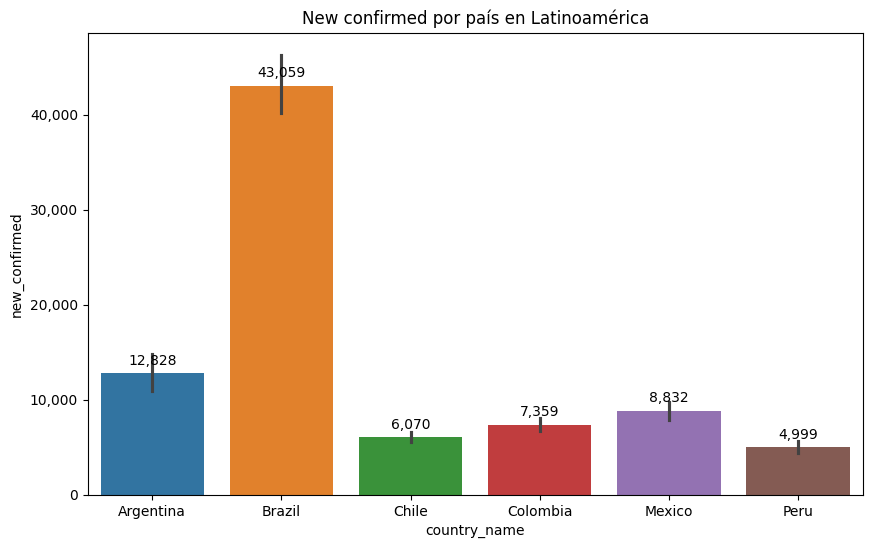

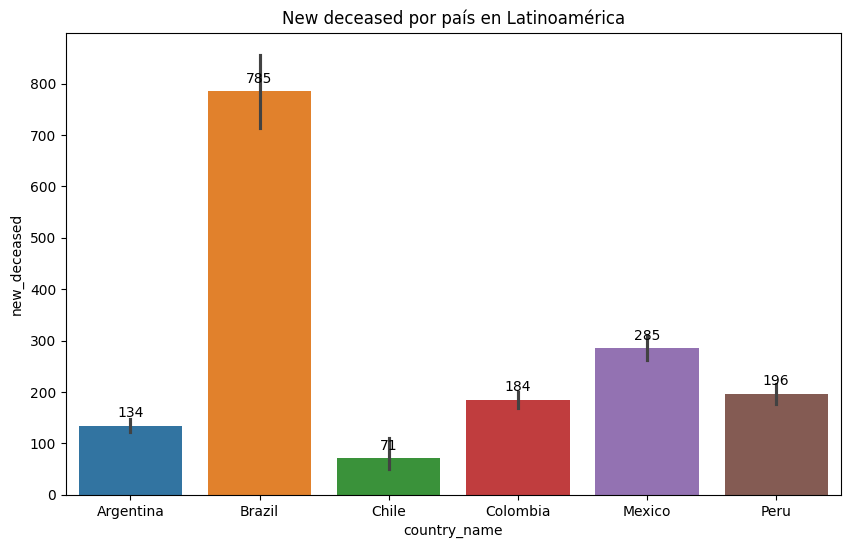

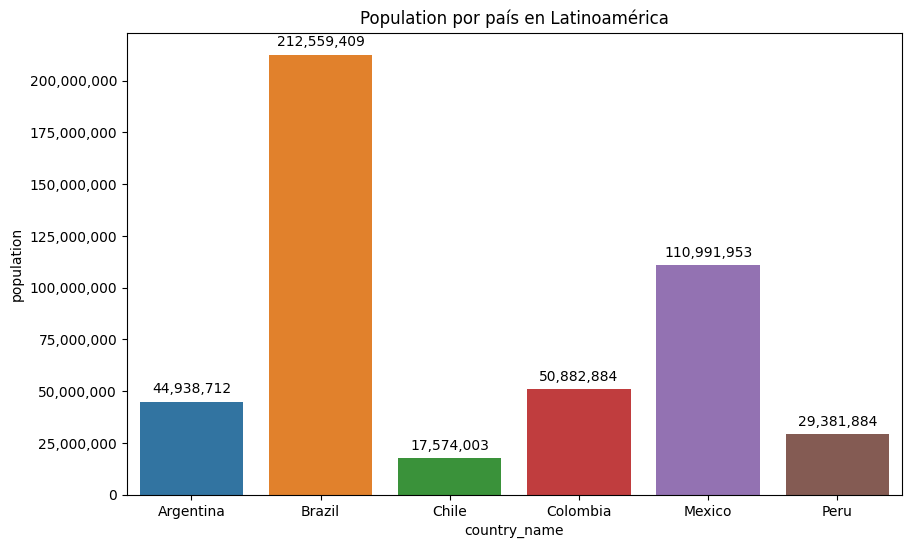

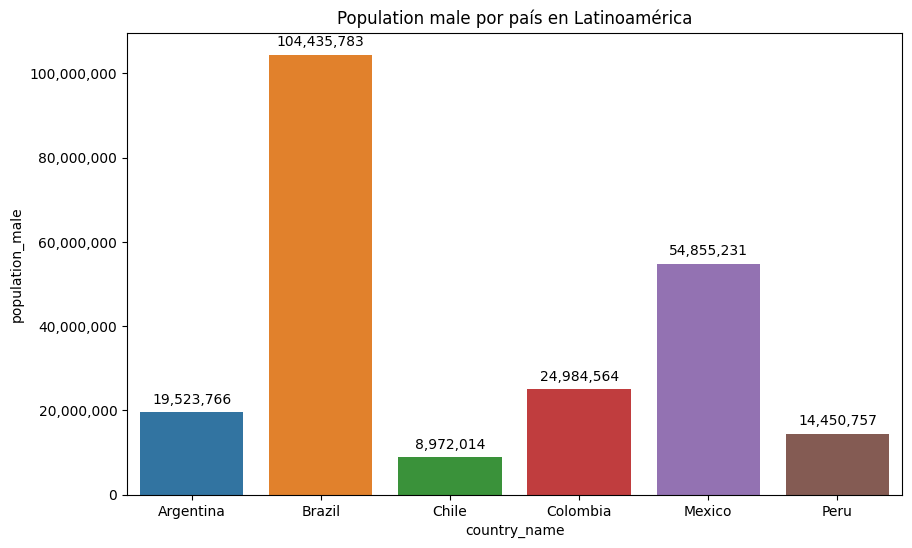

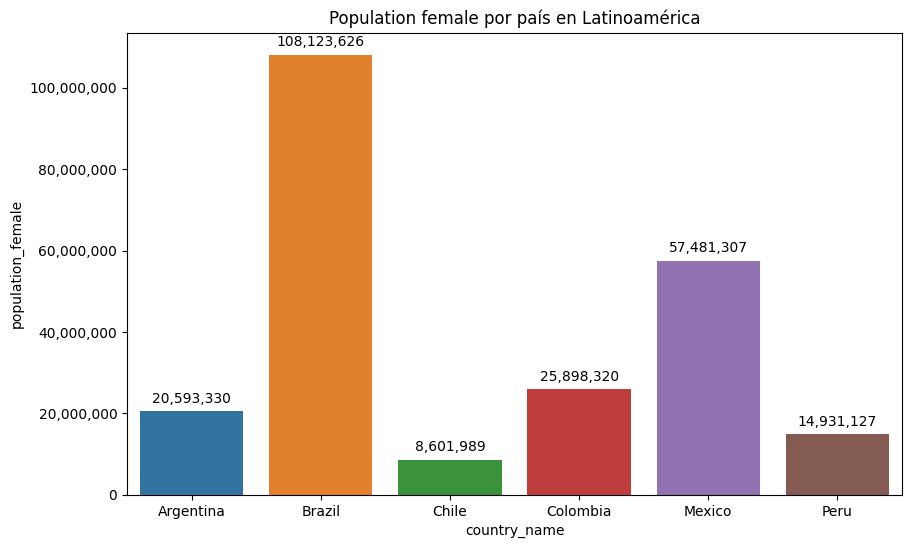

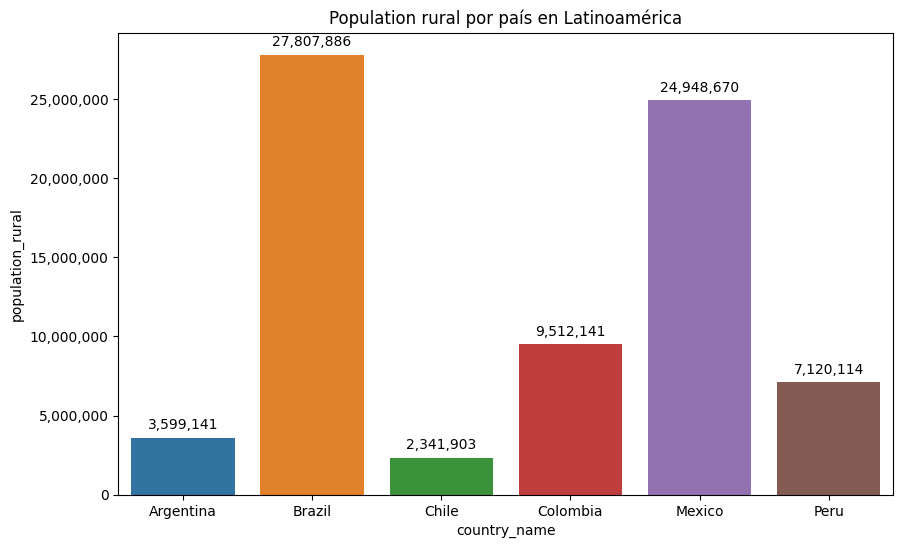

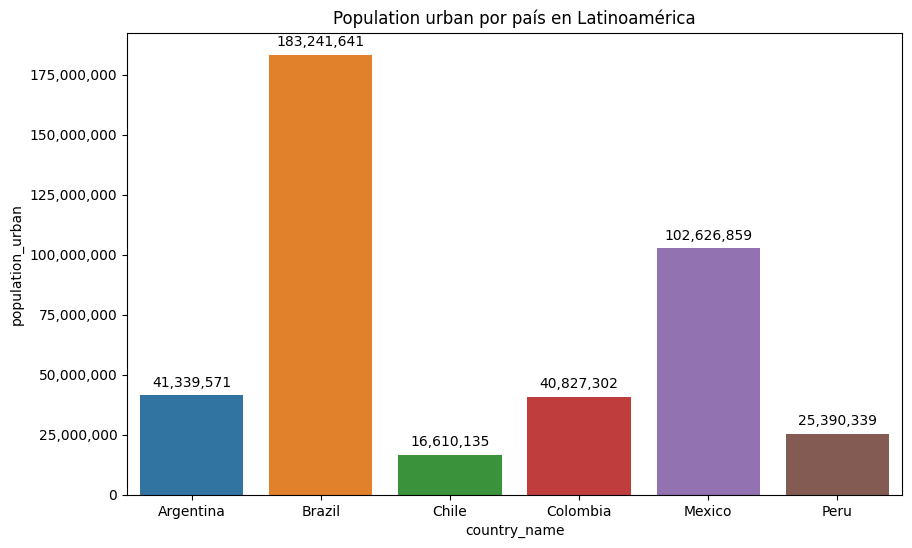

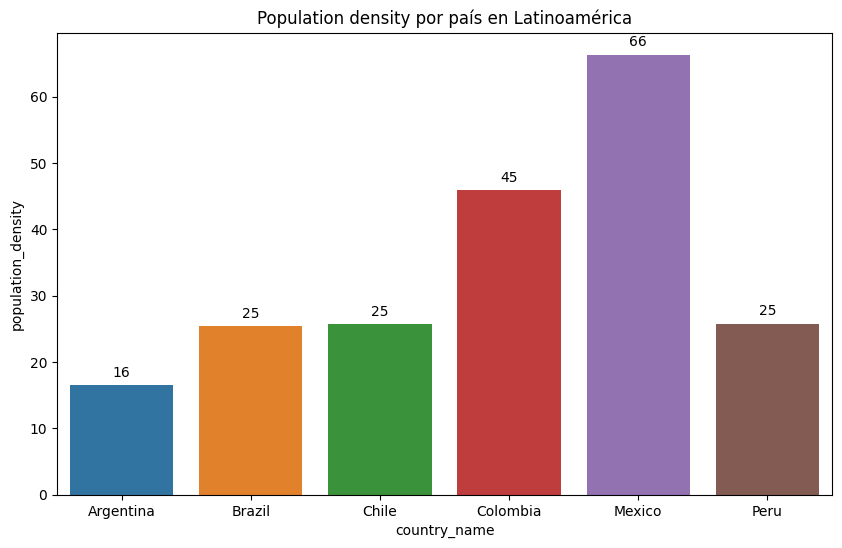

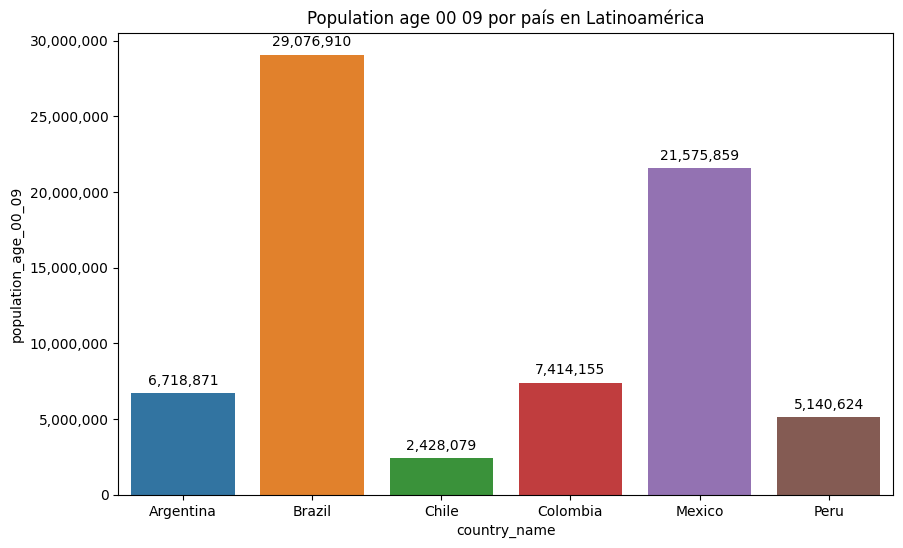

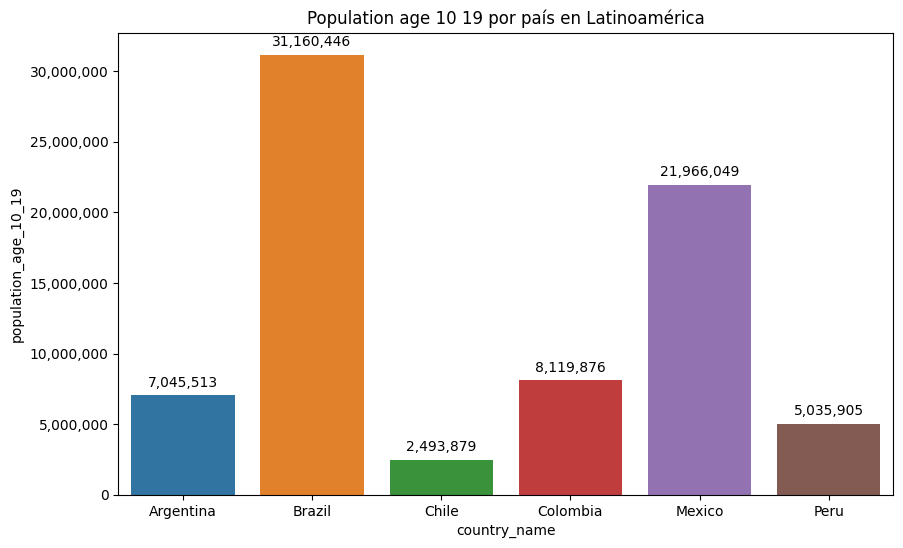

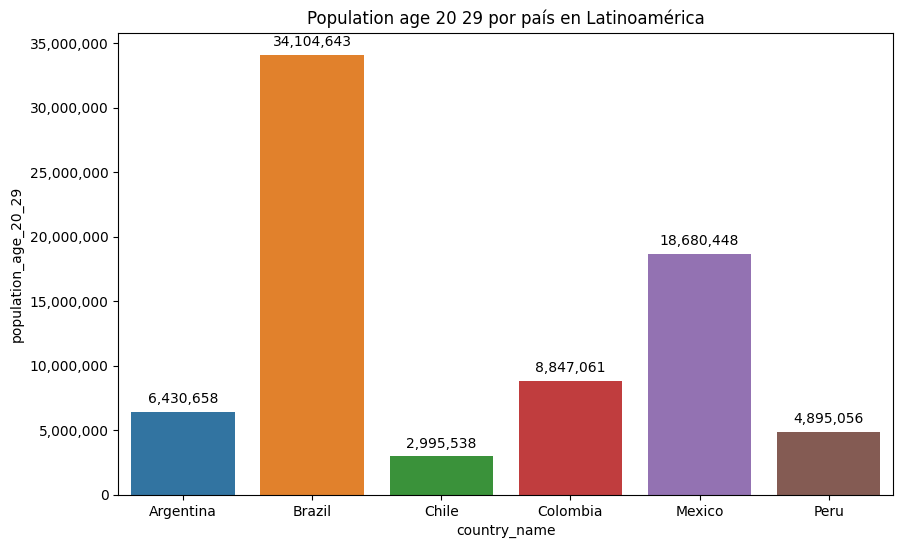

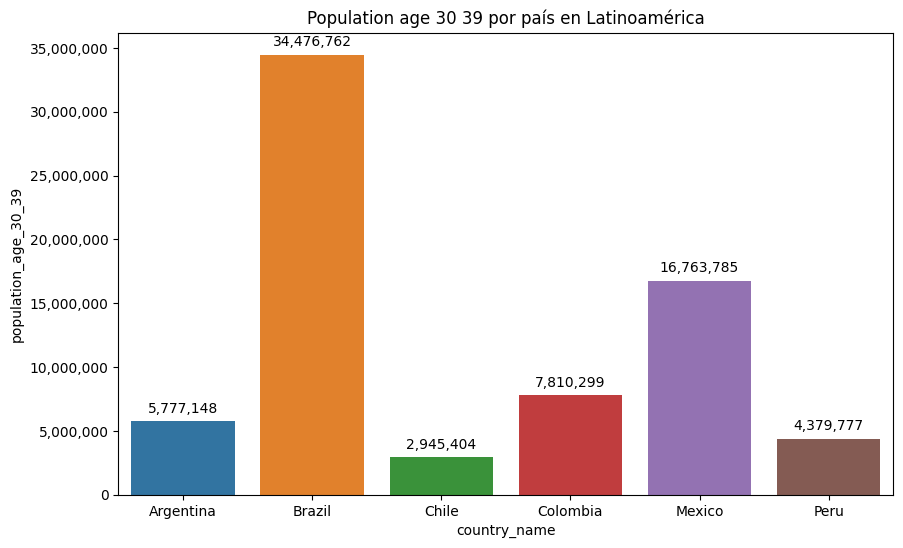

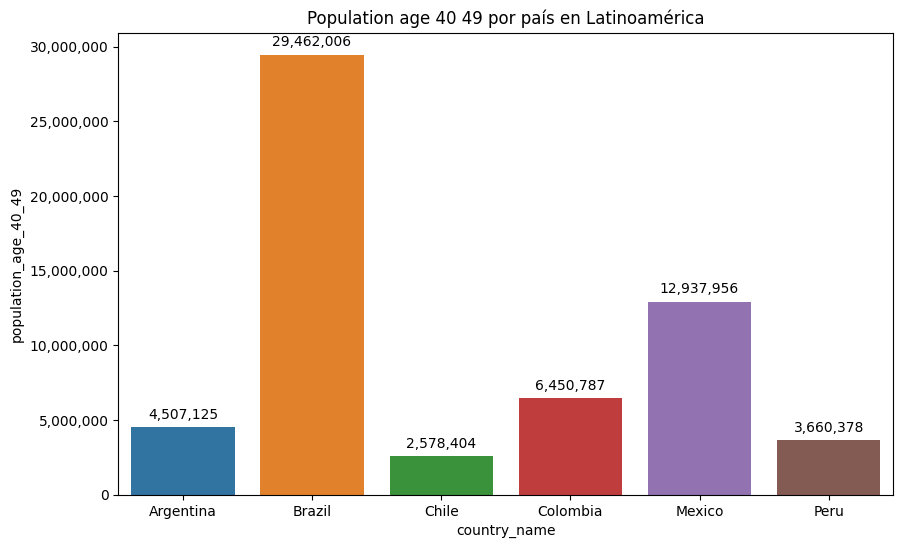

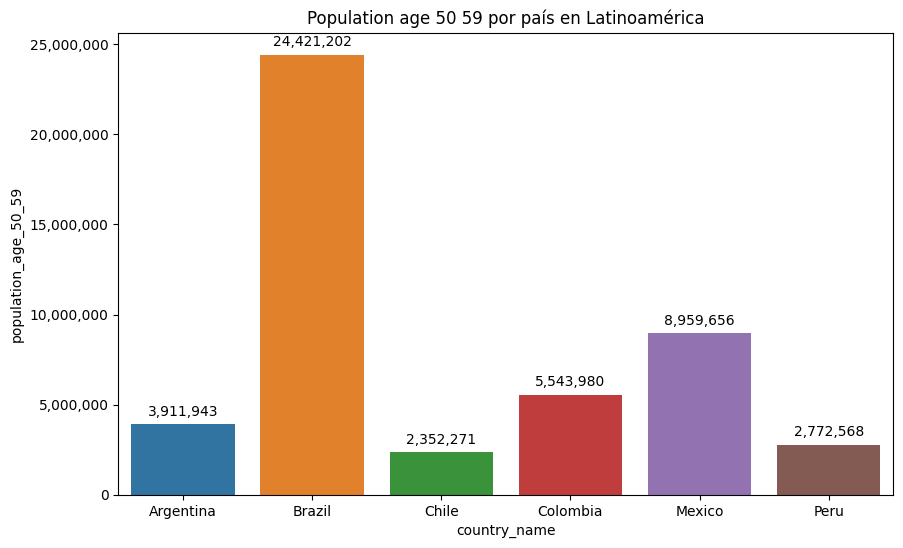

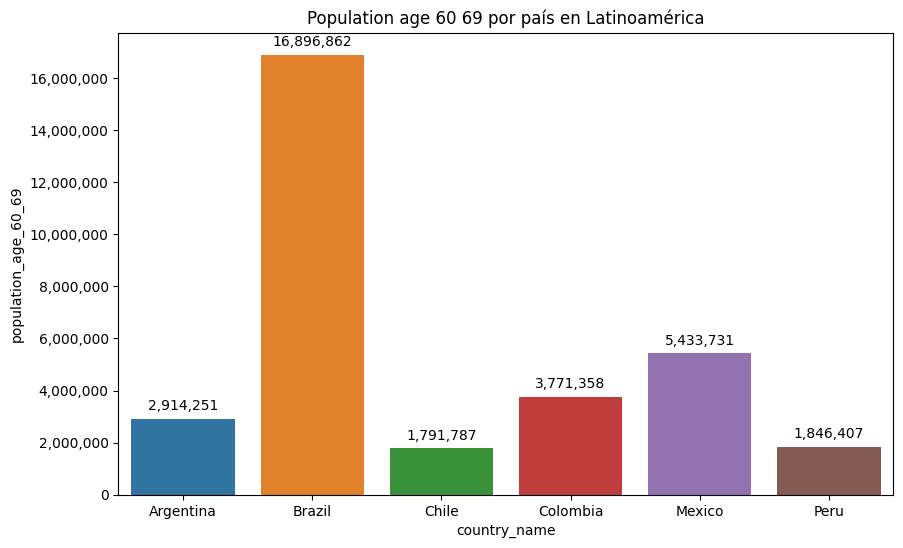

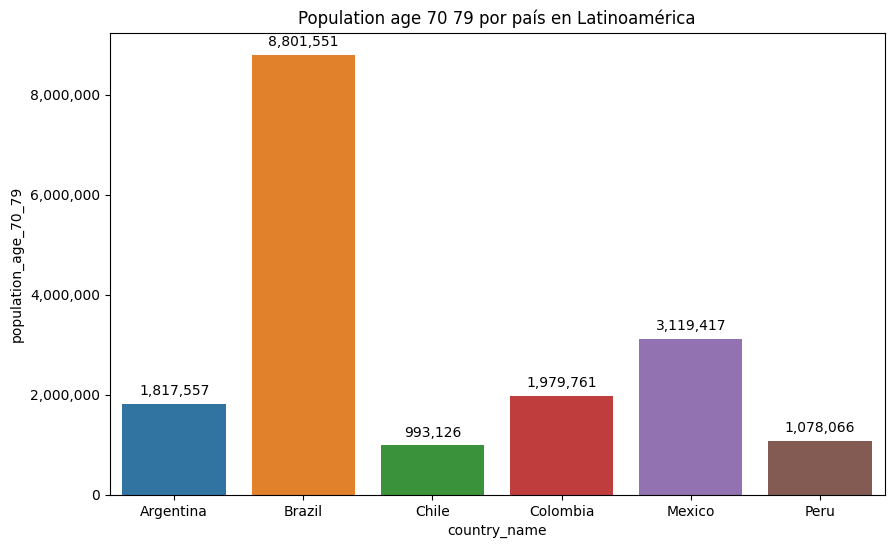

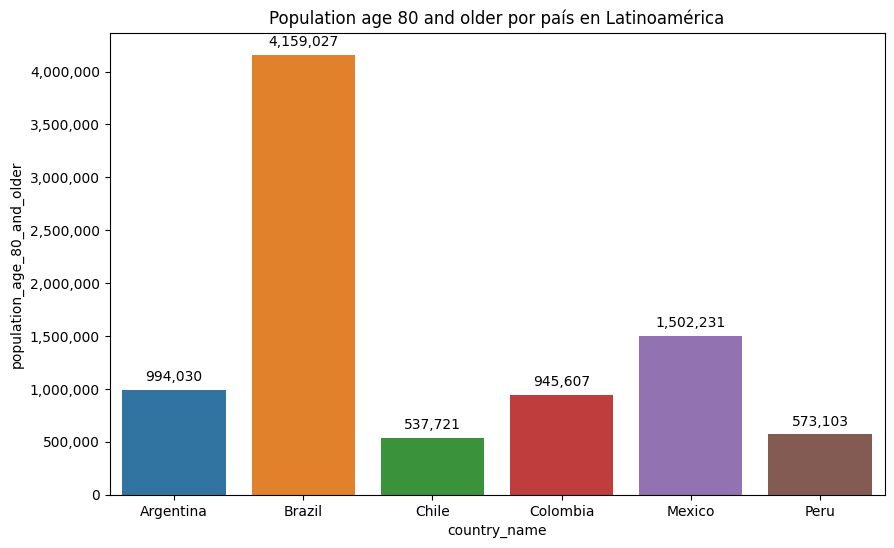

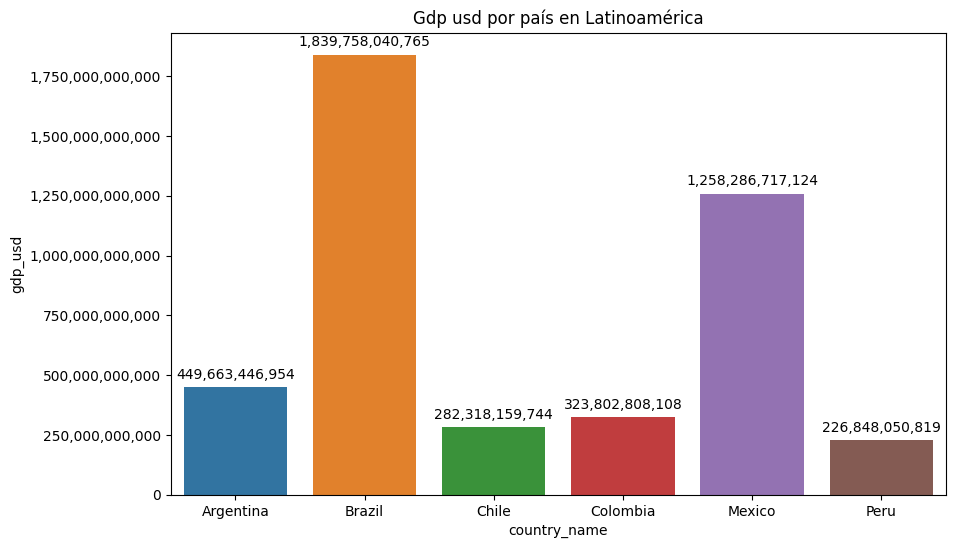

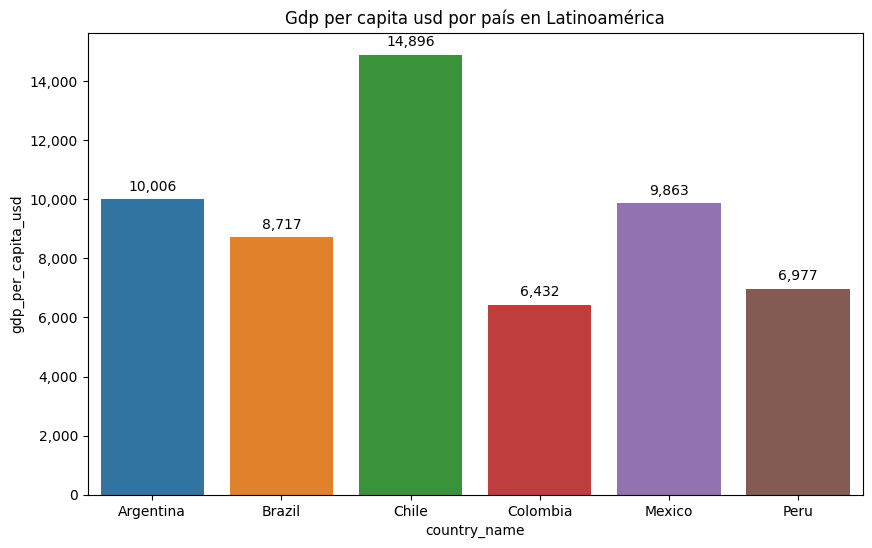

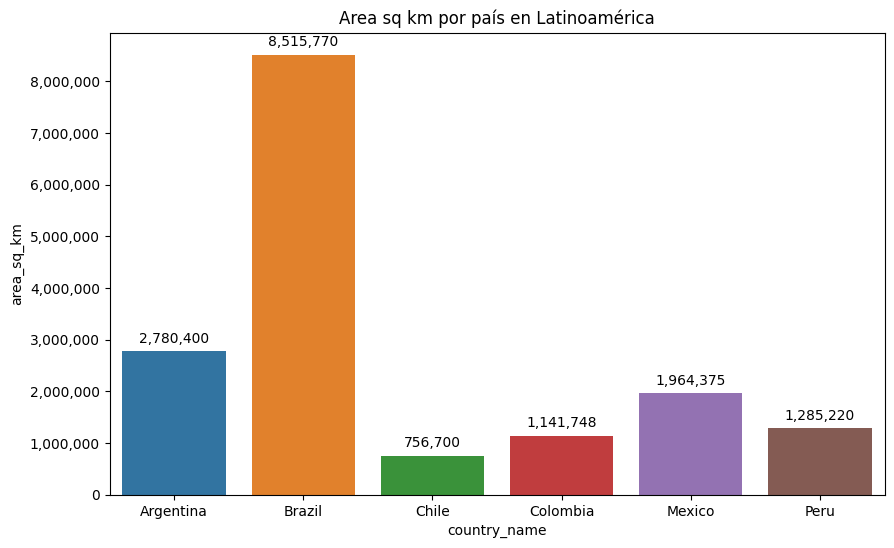

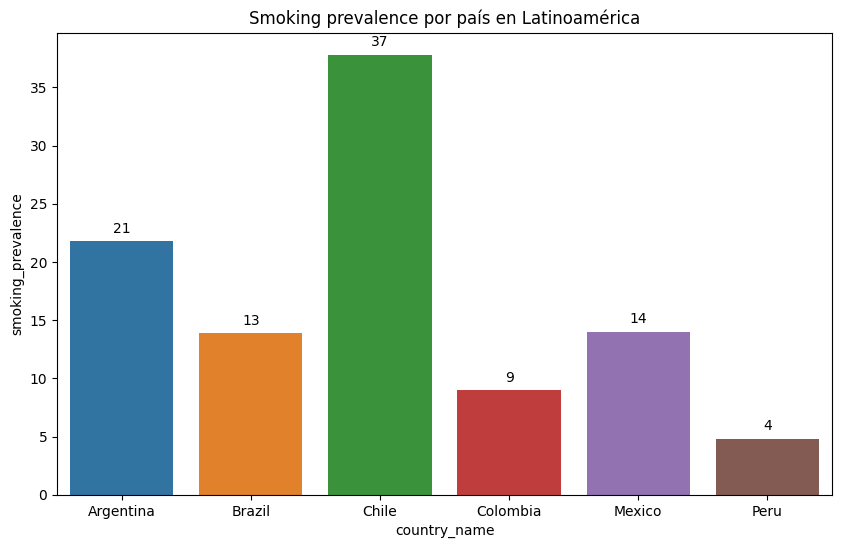

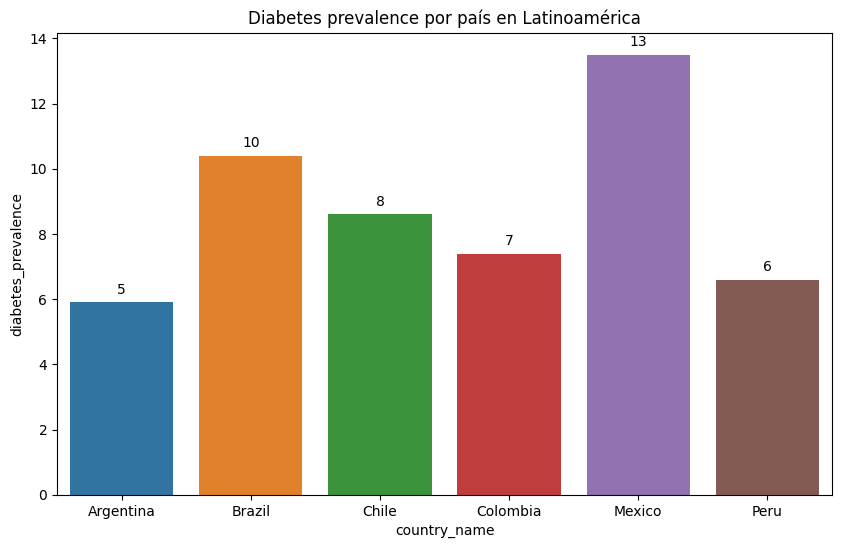

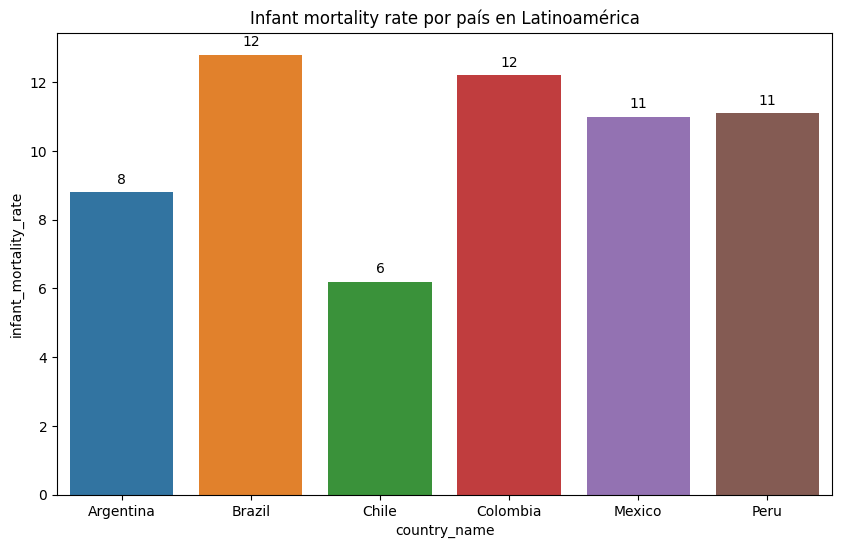

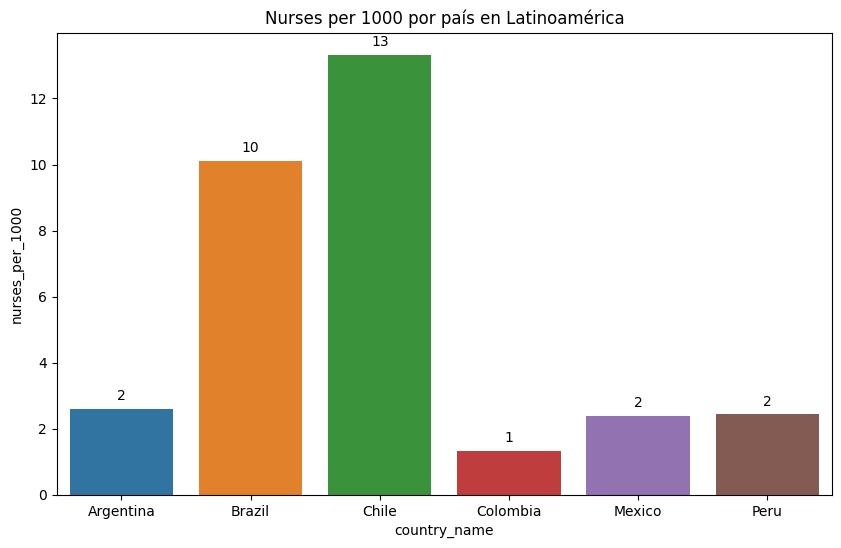

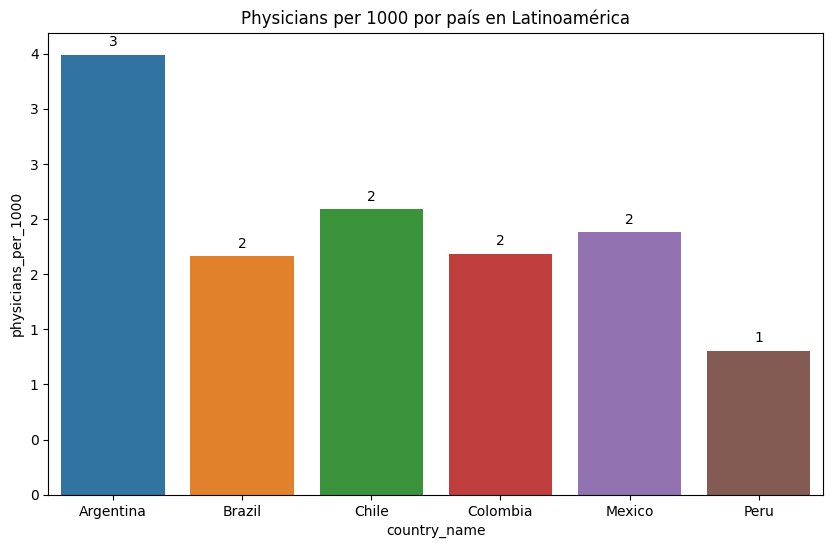

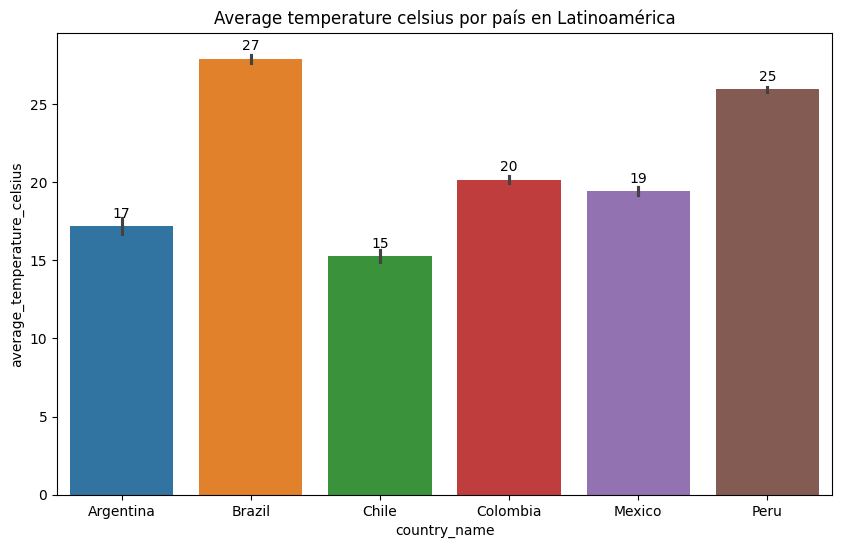

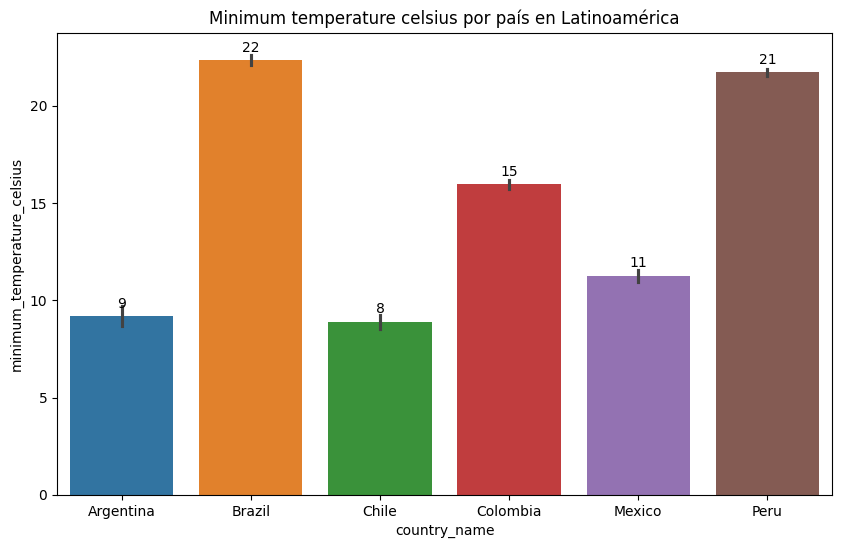

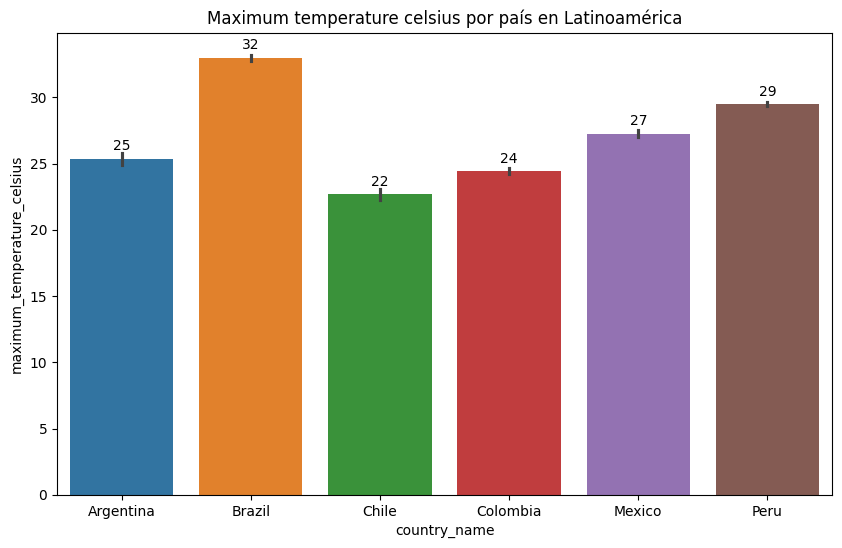

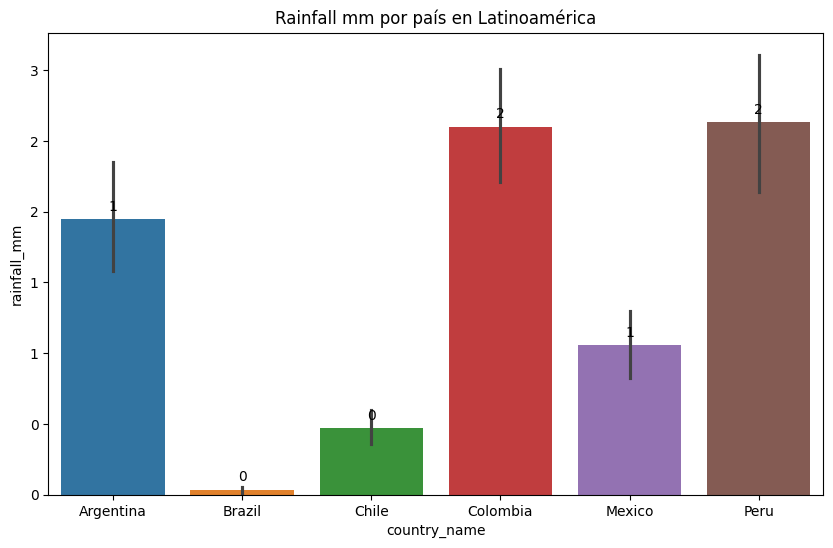

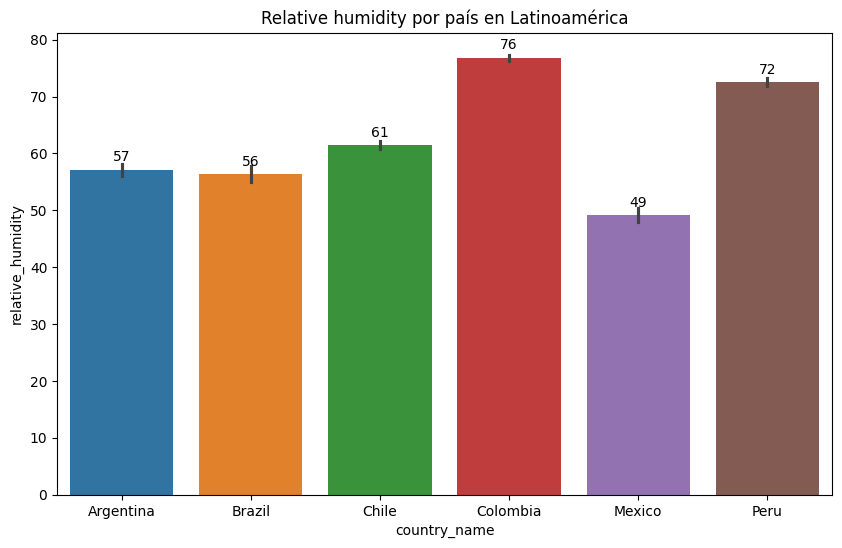

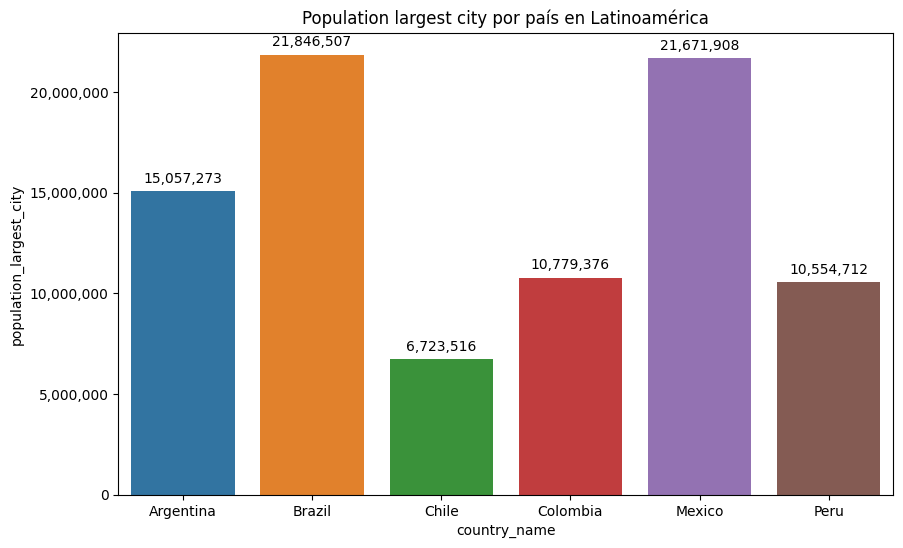

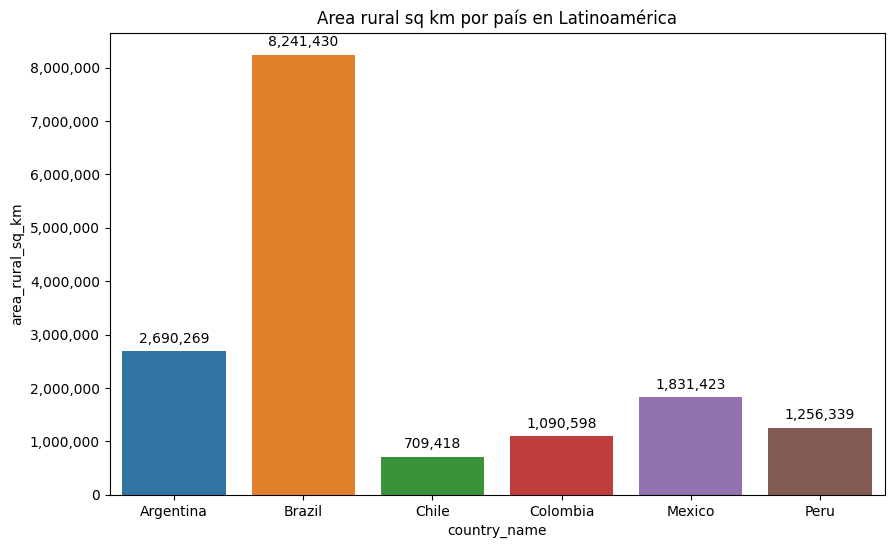

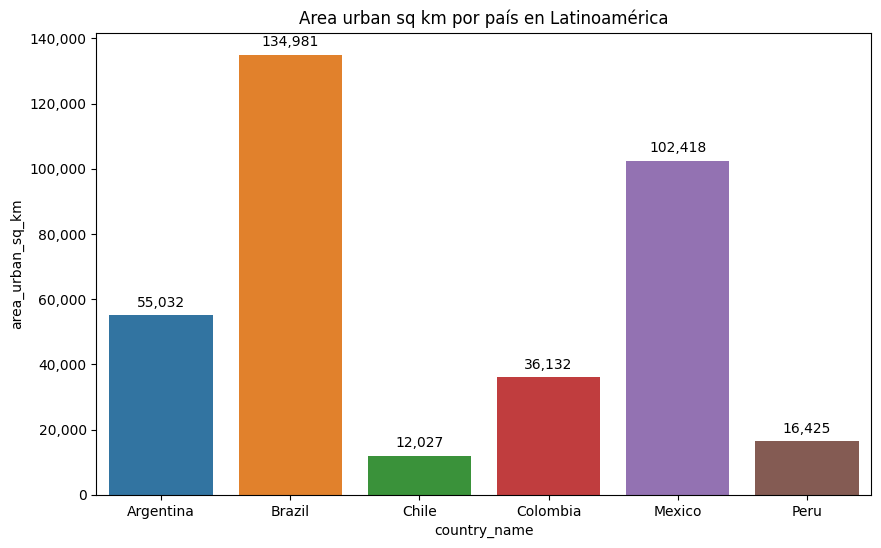

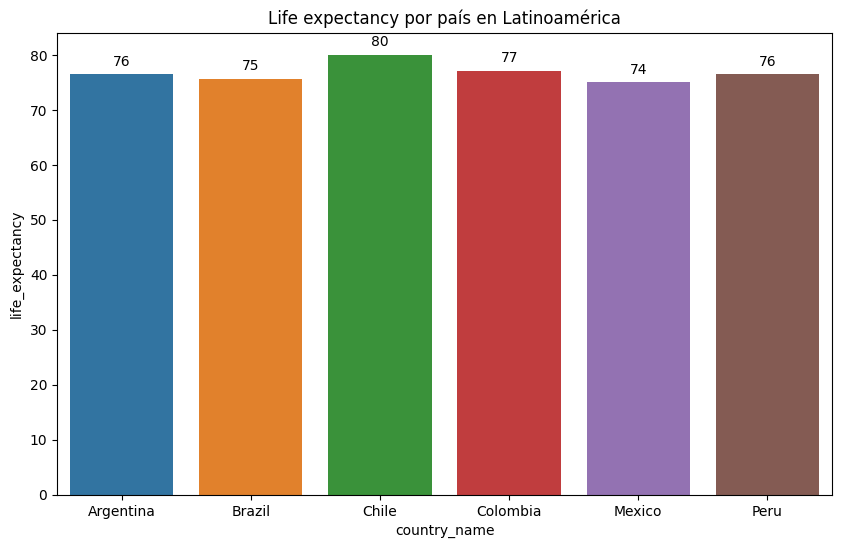

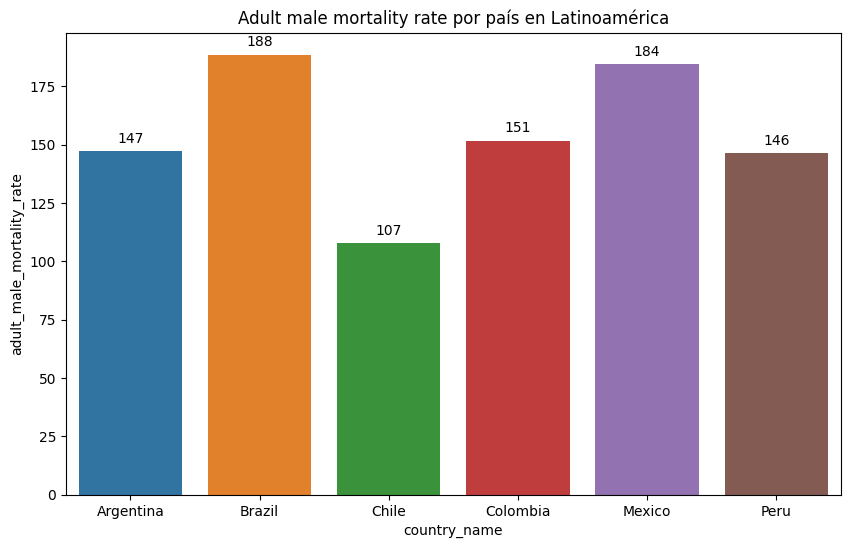

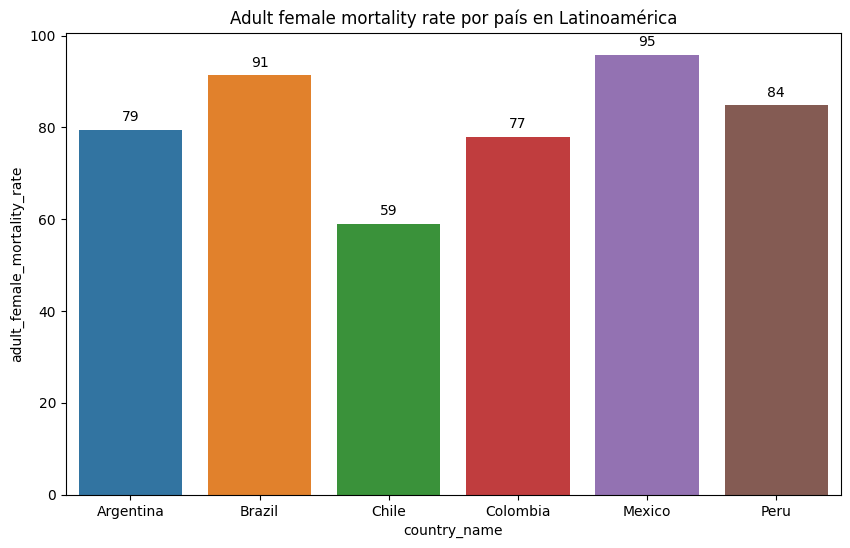

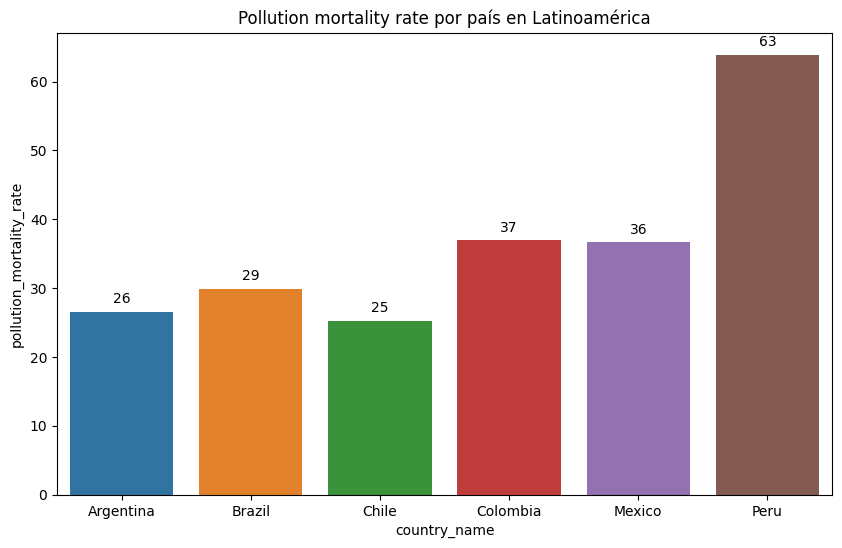

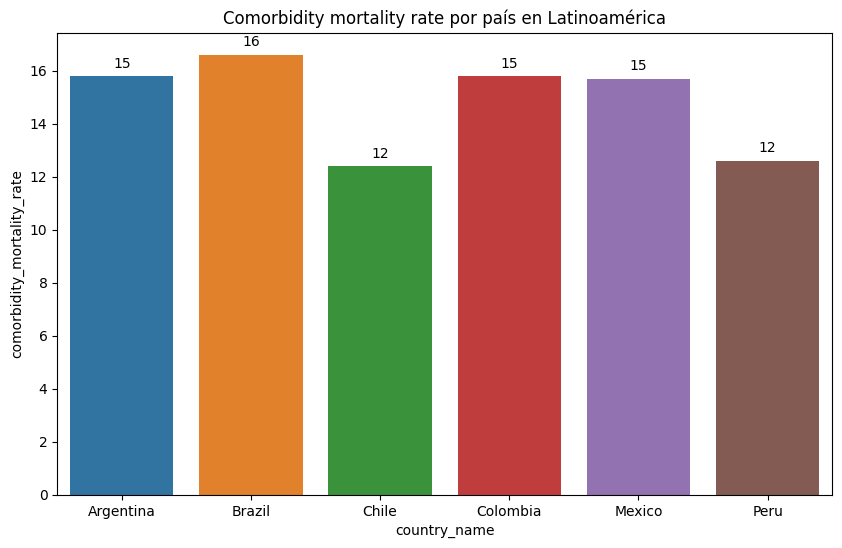

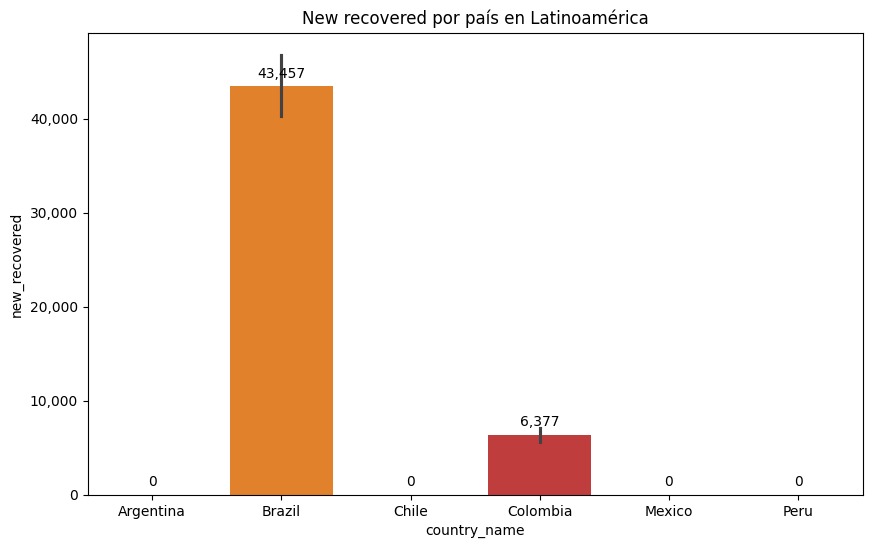

In [ ]:
#Se crea una lista de columnas que se haran los graficos

columnas = ['new_confirmed','new_deceased', 'population','population_male', 'population_female', 'population_rural','population_urban', 'population_density',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29','population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79','population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000','physicians_per_1000', 'average_temperature_celsius','minimum_temperature_celsius', 
       'maximum_temperature_celsius','rainfall_mm', 'relative_humidity', 'population_largest_city','area_rural_sq_km', 'area_urban_sq_km', 'life_expectancy',
       'adult_male_mortality_rate', 'adult_female_mortality_rate','pollution_mortality_rate', 'comorbidity_mortality_rate','new_recovered']

#Se crea un ciclo for para interar en cada columna y el cuerpo crea cada grafica
for columna in columnas:
    fig, ax = plt.subplots(figsize=(10, 6))  
    sns.barplot(x='country_name', y=columna, data=paises_ordenados, ax=ax, hue='country_name')  

    #Con un bucle anidado se crean etiquetas de cada figura
    for p in ax.patches:
        ax.annotate(format(int(p.get_height()), ',d'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points')

    #Se crea titulo por grafica con separación por miles
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: format(int(x), ',')))
    plt.title(f'{columna.replace("_", " ").capitalize()} por país en Latinoamérica')
    plt.show()


Matriz de correlacion

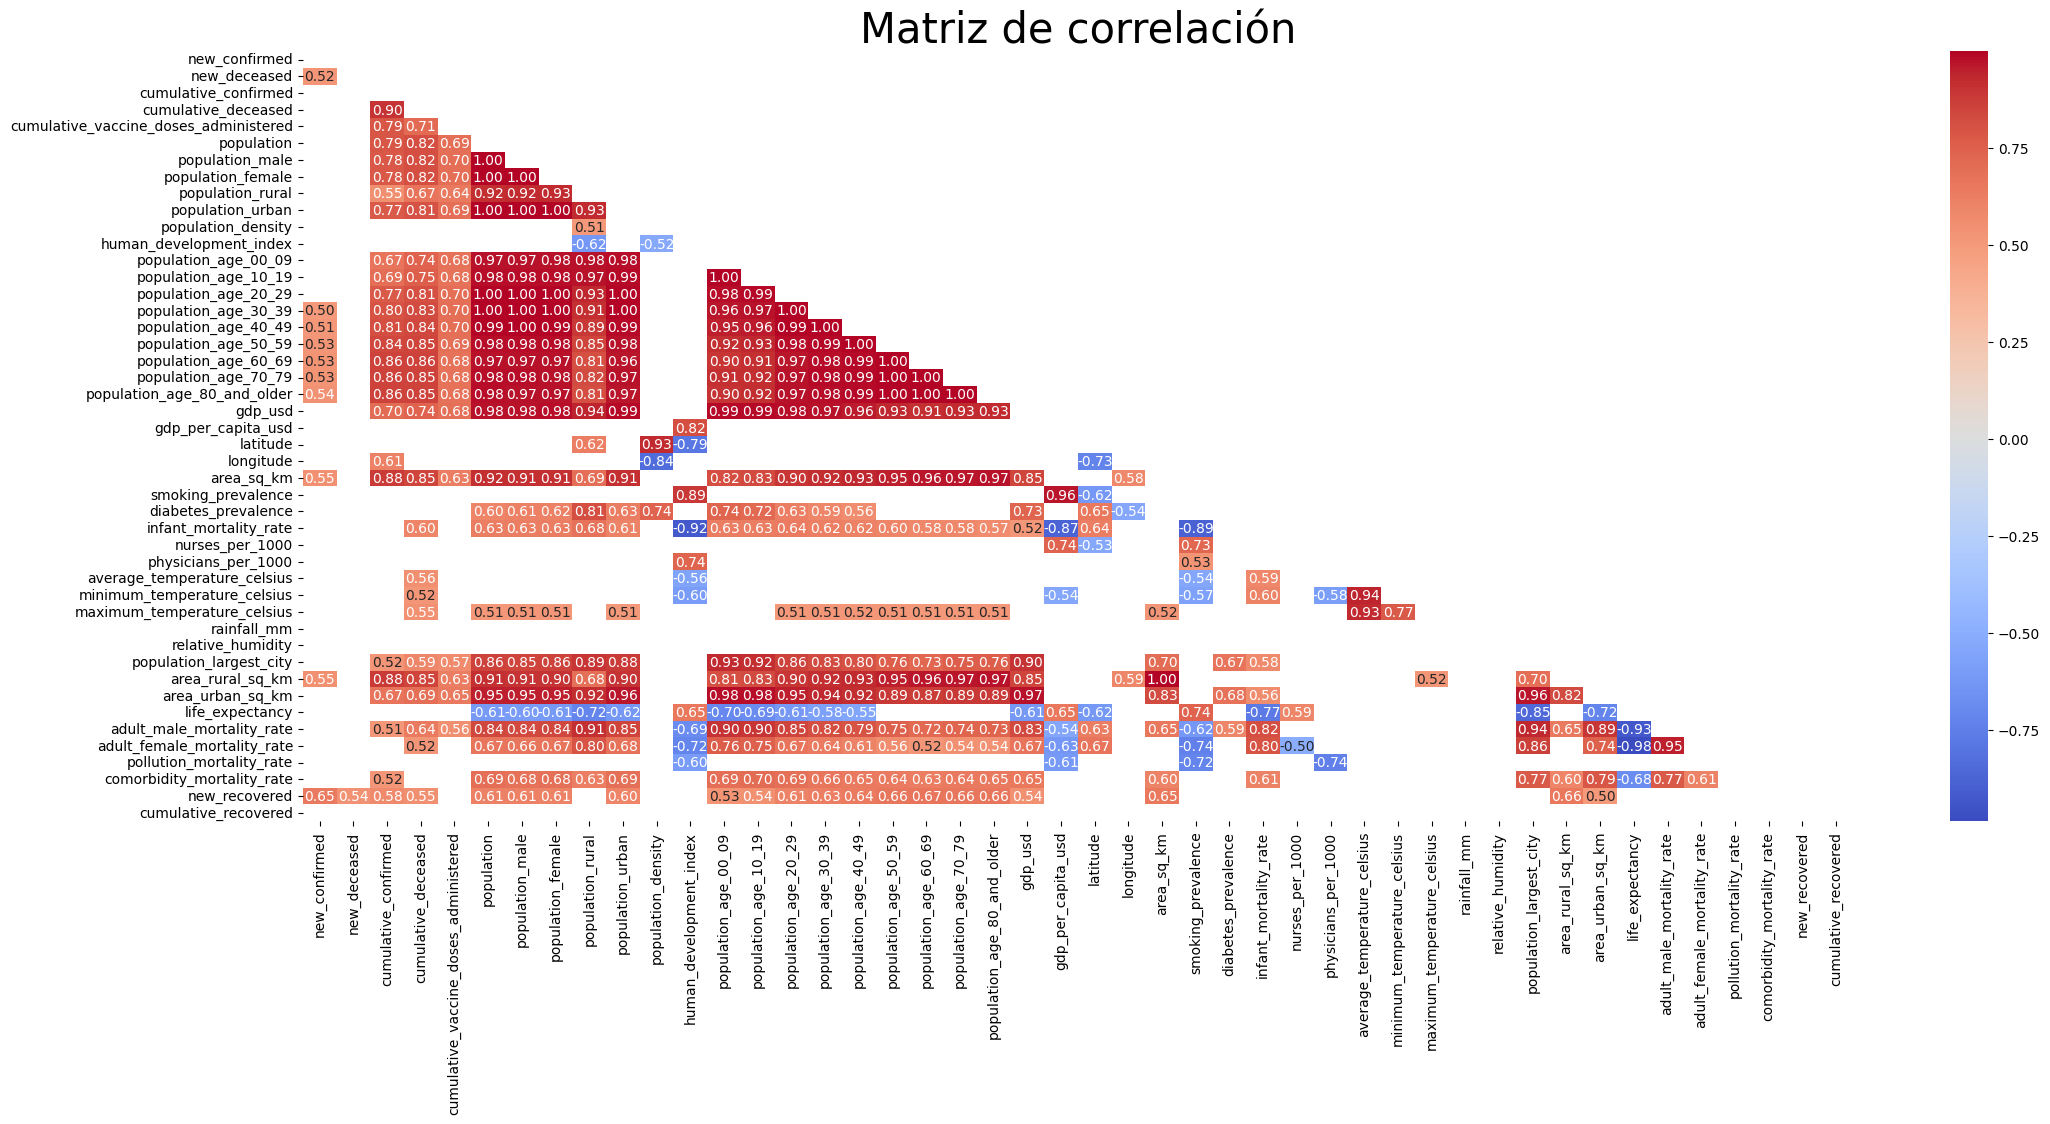

In [77]:
#Se filtran las columnas numericas
columnas_num = paises_ordenados.select_dtypes(include=['float64', 'int64']).columns

#Se calcula la matriz de correlación con su metodo
matrix_correlacion = paises_ordenados[columnas_num].corr()

#Se crea una máscara
mascara = np.triu(np.ones_like(matrix_correlacion, dtype=bool))

#Se filtra los valores de la mascara de acuerdo a los valores de la consigna
matrix_correlacion = matrix_correlacion[(matrix_correlacion > 0.5) | (matrix_correlacion < -0.5)]

#Se crea el mapa de calor
plt.figure(figsize=(25, 10))
mapa = sns.heatmap(matrix_correlacion, mask=mascara, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación', fontsize=30)
plt.show()

Histogramas 

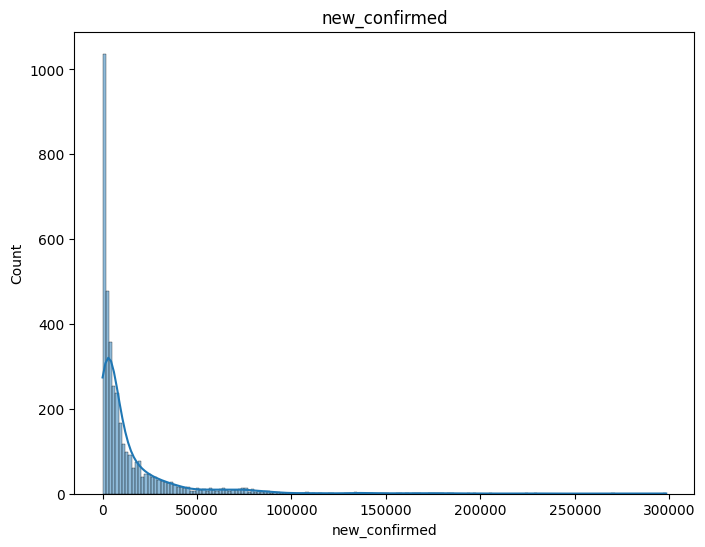

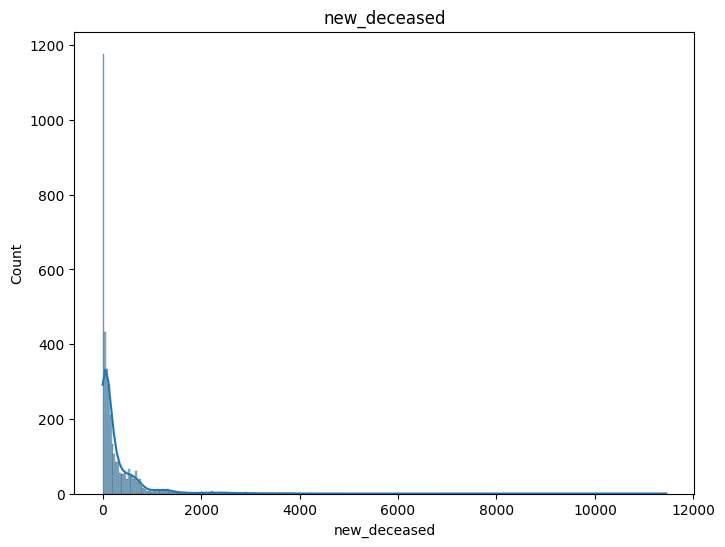

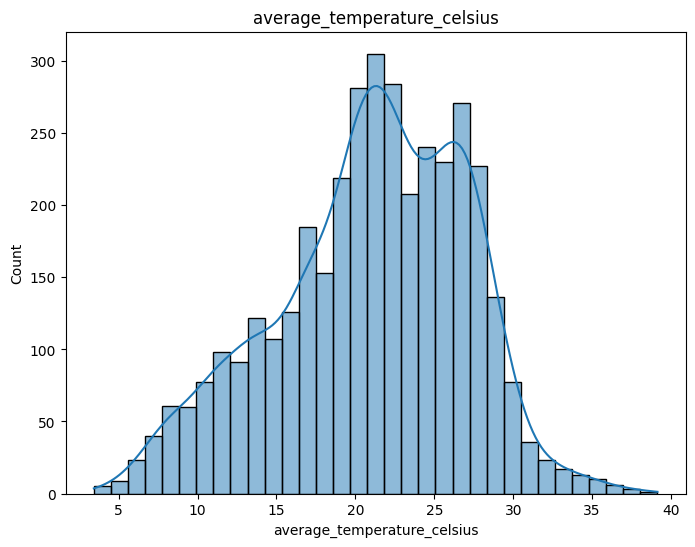

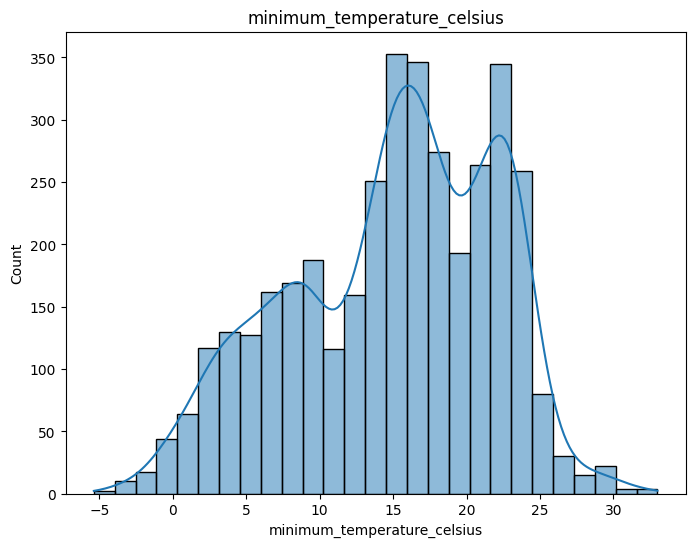

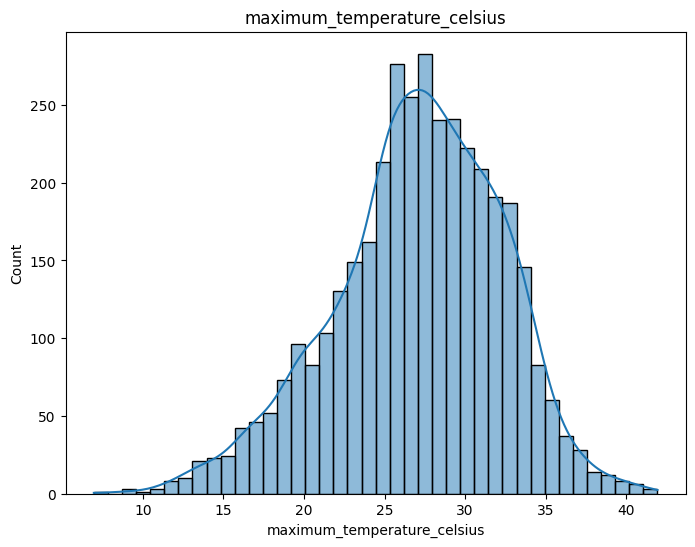

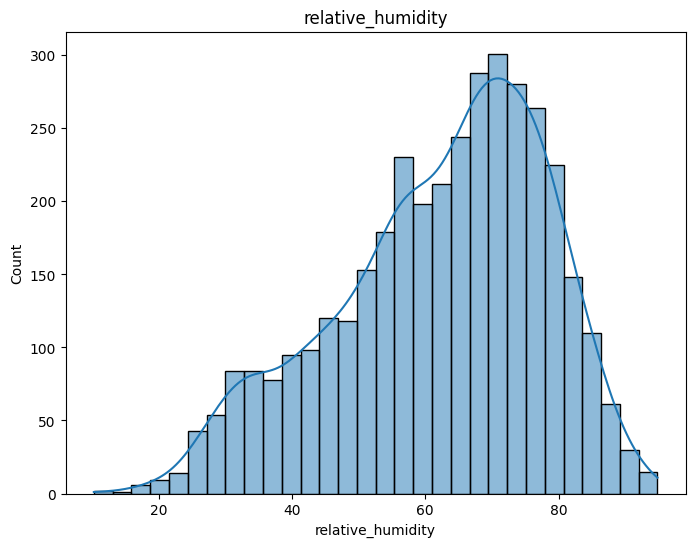

In [ ]:
#Se crea una lista de columnas que encontre que tuvieron cambios, aunque no es exhaustiva

columnas = ["new_confirmed", "new_deceased", "cumulative_confirmed", "cumulative_deceased",
            "cumulative_vaccine_doses_administered", "average_temperature_celsius", "minimum_temperature_celsius",
            "maximum_temperature_celsius", "relative_humidity"]

#Con un bucle for se itera en el dataframe atraves de las columnas de la lista. Con una condicion se filtra a las 
# columnas que no estan en la lista ad hoc que son columnas con datos no numericos

for columna in paises_ordenados[columnas]:
    if columna not in ['location_key', 'date', 'country_code', 'country_name', 'latitude', 'longitude',
                       'cumulative_confirmed', 'cumulative_deceased', 'cumulative_recovered',
                       'cumulative_vaccine_doses_administered']:
        fig, ax = plt.subplots(figsize=(8, 6))
        sns.histplot(paises_ordenados[columna], kde=True)
        plt.title(columna)
        plt.show()

Diagrama de dispersión de la temperatura media contra los casos confirmados

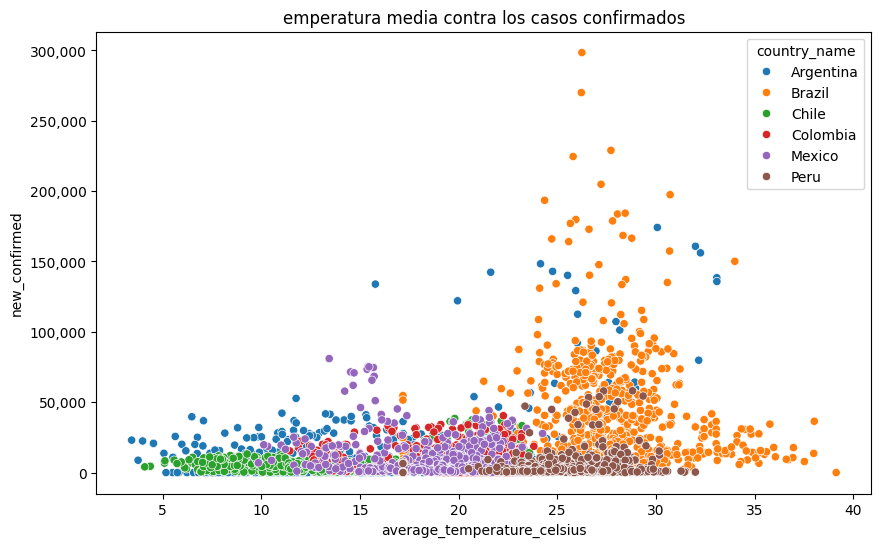

In [ ]:
#Se crea una grafica de dispersion de la temperatura (x) contra casos confirmados, con unab tercera dimension por pais

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='average_temperature_celsius', y='new_confirmed', data=paises_ordenados, hue='country_name')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: format(int(x), ',')))
plt.title('emperatura media contra los casos confirmados')
plt.show()

Diagrama de dispersión de la temperatura media contra las muertes confirmadas.

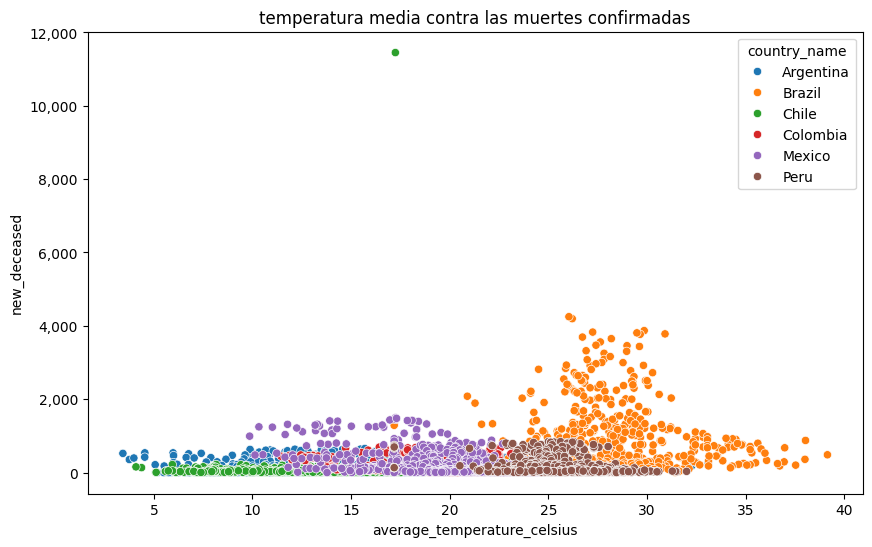

In [ ]:
#Grafica de dispersion de la temperatura promedio en x, muertes en y, y la dimesion por colores por pais

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='average_temperature_celsius', y='new_deceased', data=paises_ordenados, hue='country_name', ax=ax)
plt.title('temperatura media contra las muertes confirmadas')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: format(int(x), ',')))
plt.show()

Comportamiento de las dosis administradas de todos los países 

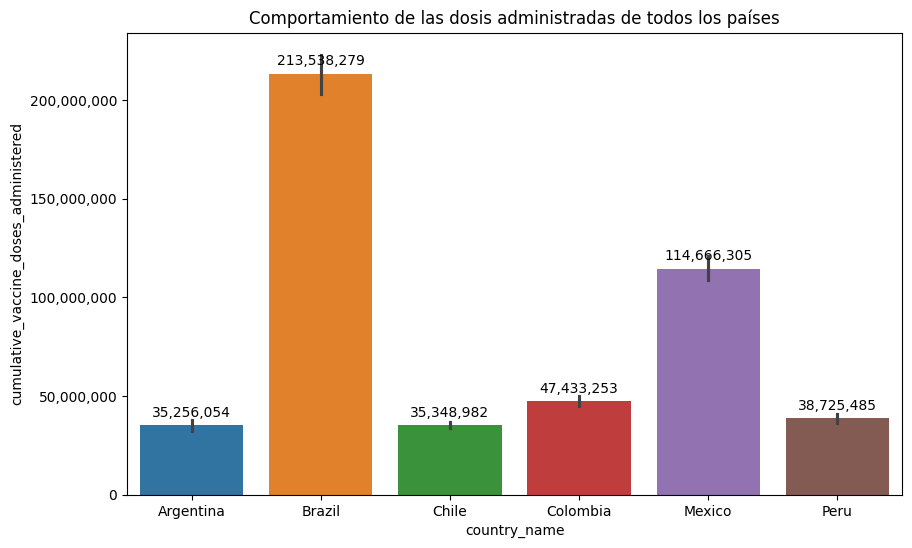

In [ ]:
#Se crea una grafica de barras con x en nombre por pais, en y el numero de vacunas, con la dimension por colores

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='country_name', y='cumulative_vaccine_doses_administered', data=paises_ordenados, ax=ax, 
            hue='country_name')

for i in ax.patches:
    ax.annotate(format(int(i.get_height()), ',d'),
                (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: format(int(x), ',')))
plt.title('Comportamiento de las dosis administradas de todos los países')
plt.show()

Muertes por mes de cada país

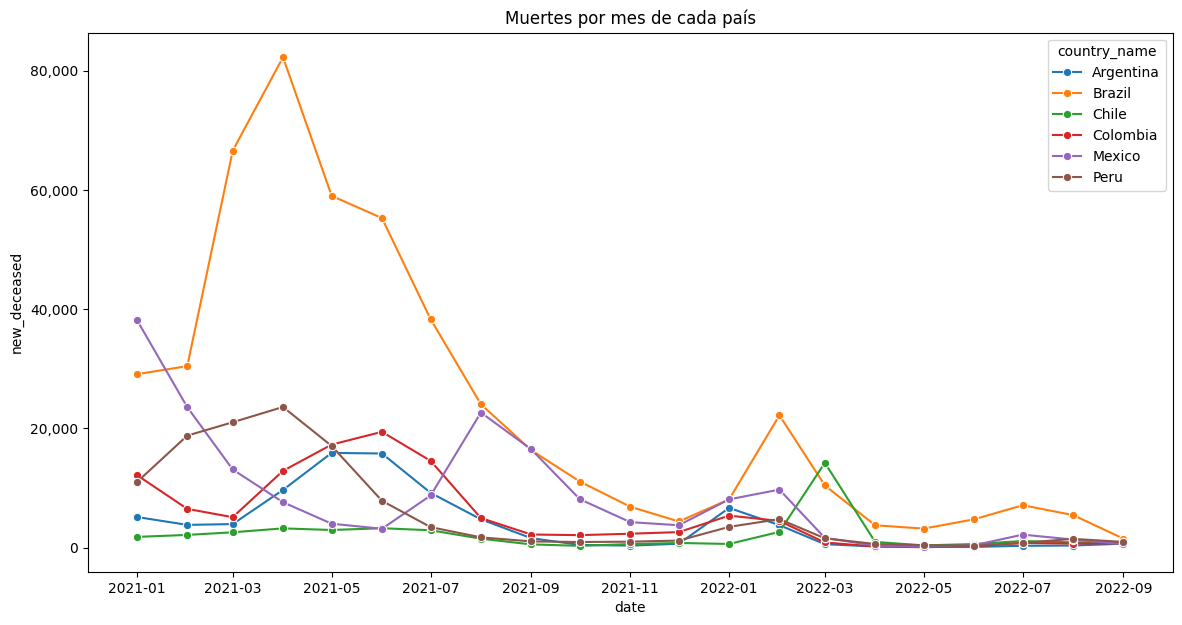

In [20]:
#Se crea una grafica de lineas que acumula la suma de las muertes agrupadas por pais. Se almacena el agrupamiento por pais fromateada (se reseteo el indice por 
# fecha) por mes y suman las cifras de muertes. Todo almacenado en una variable que se usa para construir la grafica de lineas 

muertes_mes = paises_ordenados.groupby([paises_ordenados.index.to_period('M'), 'country_name'])['new_deceased'].sum().reset_index()
muertes_mes['date'] = muertes_mes['date'].dt.to_timestamp()

fig, ax = plt.subplots(figsize=(14, 7))
sns.lineplot(x='date', y='new_deceased', hue='country_name', data=muertes_mes, marker='o', ax=ax)

plt.title('Muertes por mes de cada país')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: format(int(x), ',')))
plt.show()

Casos confirmados por mes de cada país.

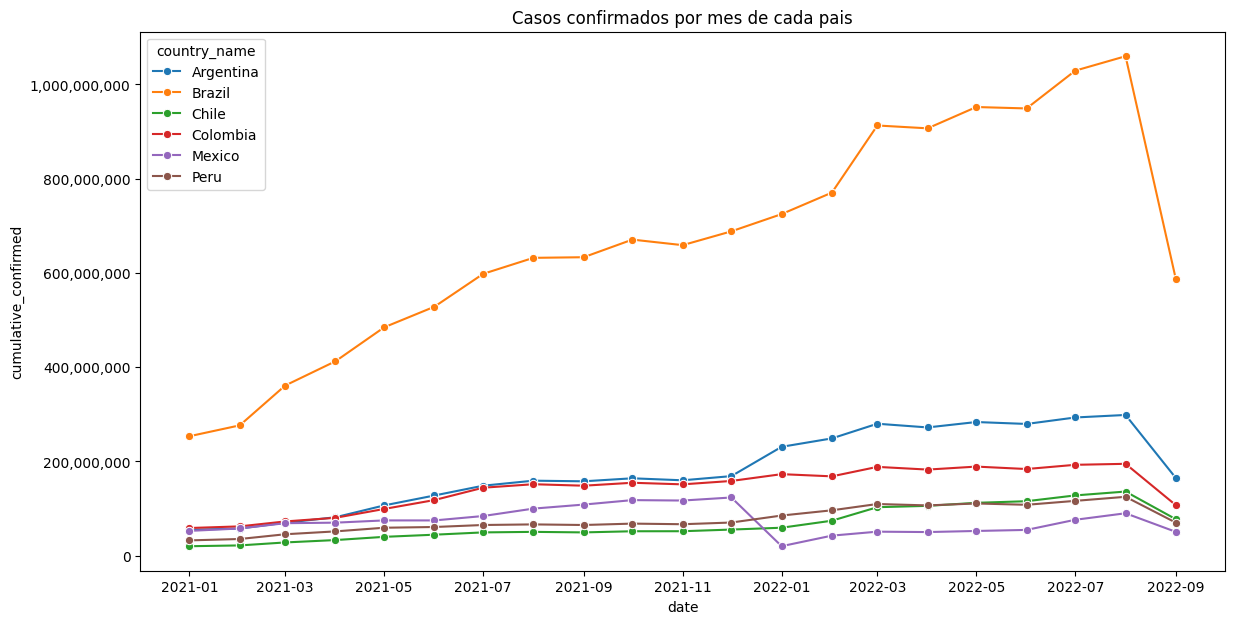

In [ ]:
#Se crea una grafica de lineas que acumula la suma de las casos agrupadas por pais. Se almacena el agrupamiento por pais fromateada (se reseteo el indice por 
# fecha) por mes y suman las cifras de casos confirmados. Todo almacenado en una variable que se usa para construir la grafica de lineas

casos_mes = paises_ordenados.groupby([paises_ordenados.index.to_period('M'), 'country_name'])['cumulative_confirmed'].sum().reset_index()
casos_mes['date'] = casos_mes['date'].dt.to_timestamp()

fig, ax = plt.subplots(figsize=(14, 7))
sns.lineplot(x='date', y='cumulative_confirmed', hue='country_name', data=casos_mes, marker='o', ax=ax)

plt.title('Casos confirmados por mes de cada pais')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: format(int(x), ',')))

Recuperaciones de casos por mes de cada país

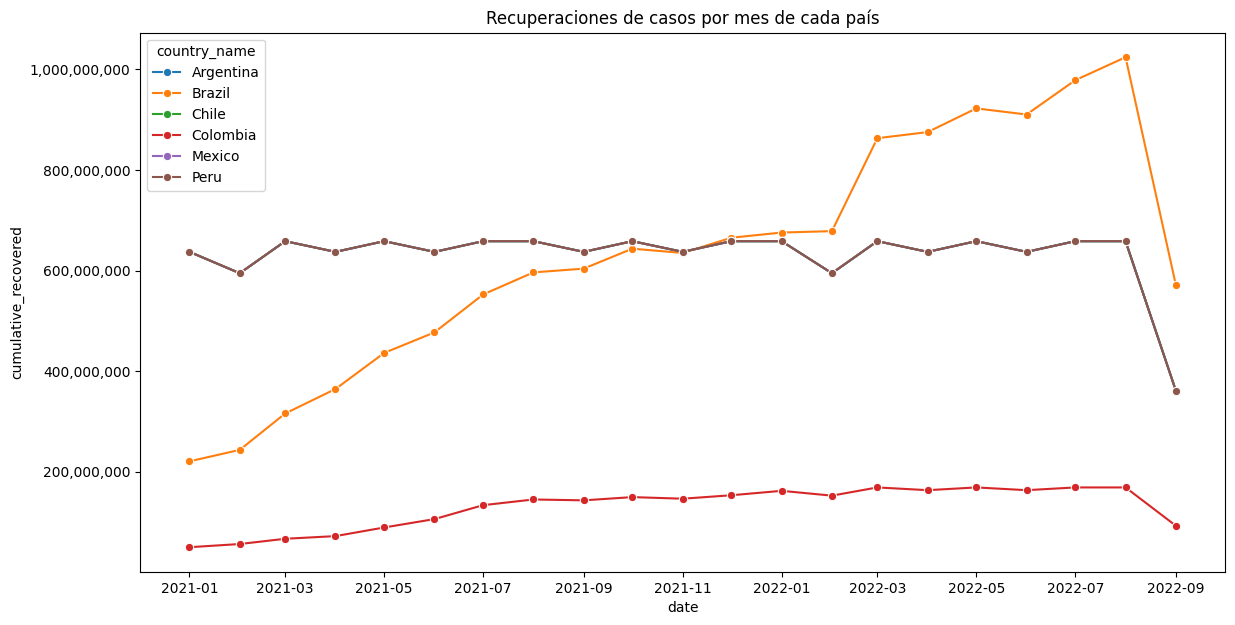

In [34]:
#Se crea una grafica de lineas que acumula la suma de las recuperaciones agrupadas por pais. Se almacena el agrupamiento por pais fromateada (se reseteo el 
# indice por fecha) por mes y suman las cifras de recuperaciones de casos. Todo almacenado en una variable que se usa para construir la grafica de lineas

recuperaciones_mes = paises_ordenados.groupby([paises_ordenados.index.to_period('M'), 'country_name'])['cumulative_recovered'].sum().reset_index()
recuperaciones_mes['date'] = recuperaciones_mes['date'].dt.to_timestamp()

fig, ax = plt.subplots(figsize=(14, 7))
sns.lineplot(x='date', y='cumulative_recovered', hue='country_name', data=recuperaciones_mes, marker='o', ax=ax)

plt.title('Recuperaciones de casos por mes de cada país')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: format(int(x), ',')))

Comparación del Número de Casos Nuevos entre Países

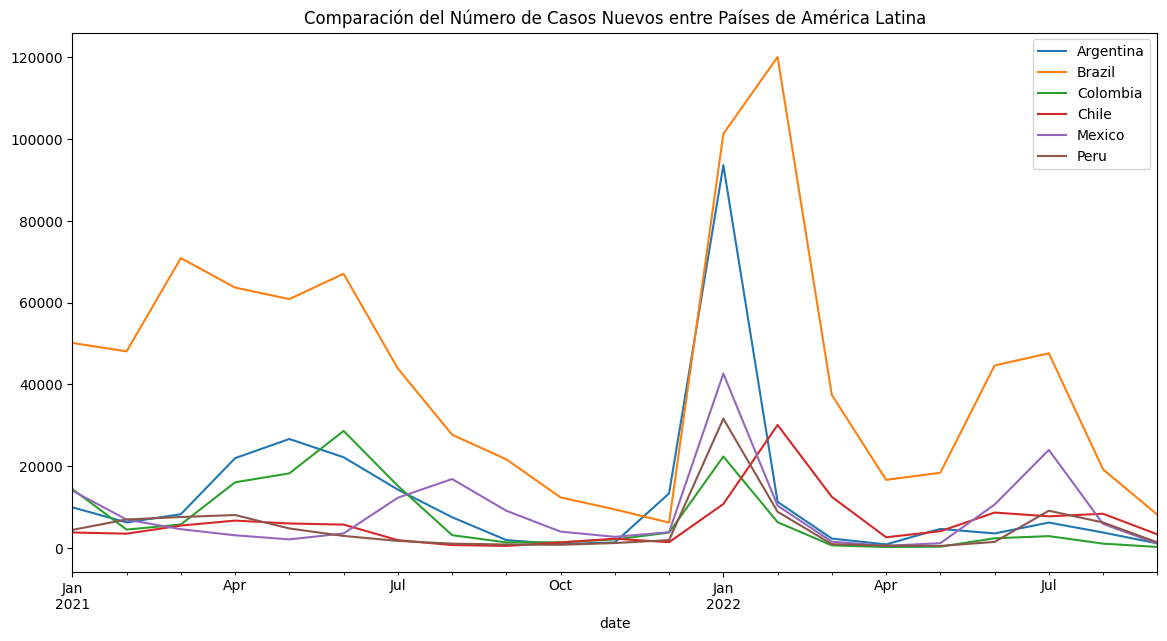

In [ ]:
#Se crea una grafica de lineas que acumula la suma de casos nuevos por pais. Con un bucle for se itera sobre una lista ya creada de los paises necesarios y el
# cuerpo extrae la cifra de casos confirmados de cda pais

fig, ax = plt.subplots(figsize=(14, 7))
for pais in paises_filtrados:
    paises_ordenados[paises_ordenados['country_name']==pais].resample('ME').mean(numeric_only=True)['new_confirmed'].plot()
plt.title('Comparación del Número de Casos Nuevos entre Países')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_filtrados)
plt.show()

Dosis acumuladas por país

Text(0.5, 1.0, 'Dosis acumuladas por país')

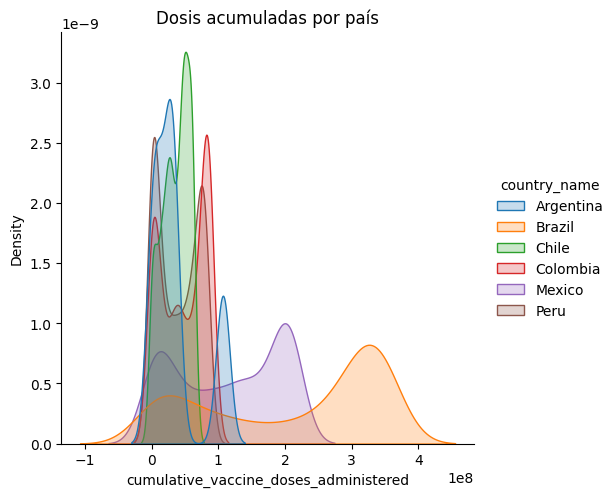

In [48]:
#Grafica de areas que muestra las vacunas realizadas por pais y que las compara por pais

sns.displot(paises_ordenados, x="cumulative_vaccine_doses_administered", hue="country_name", kind="kde", fill=True)
plt.title('Dosis acumuladas por país')

Boxplot de temperatura media de cada país

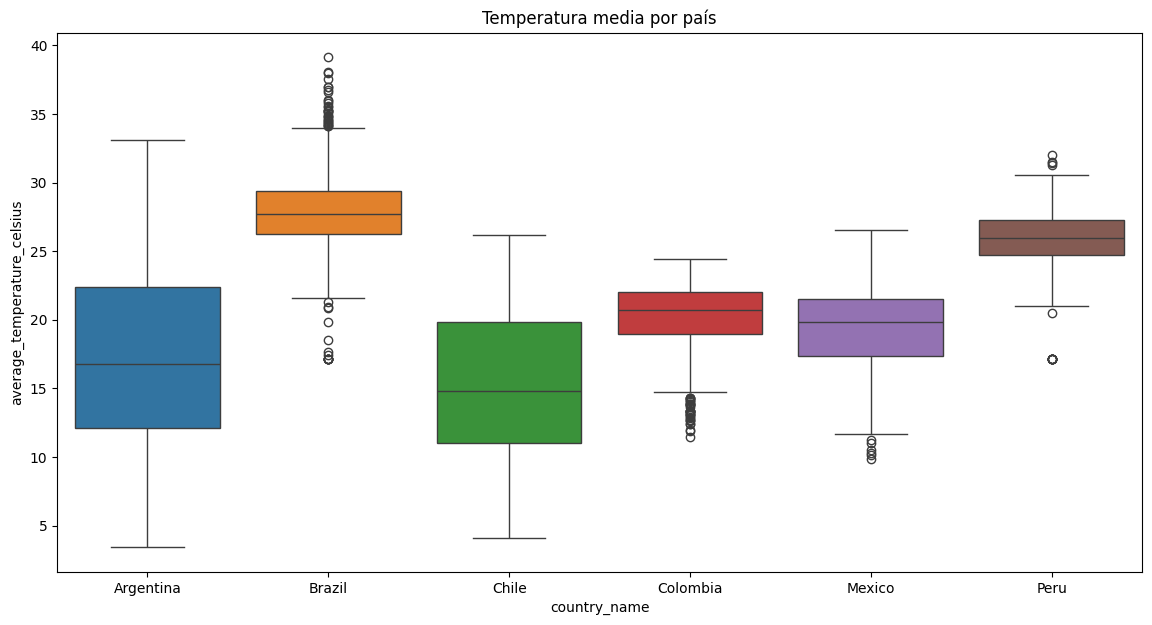

In [49]:
#Grafica de caja que compara las temperaturas entre paises

fig, ax = plt.subplots(figsize=(14, 7))
sns.boxplot(x='country_name', y='average_temperature_celsius', data=paises_ordenados, hue='country_name')
plt.title('Temperatura media por país')
plt.show()

Violinplot de las variables que “Sí” tenga cambios de valores

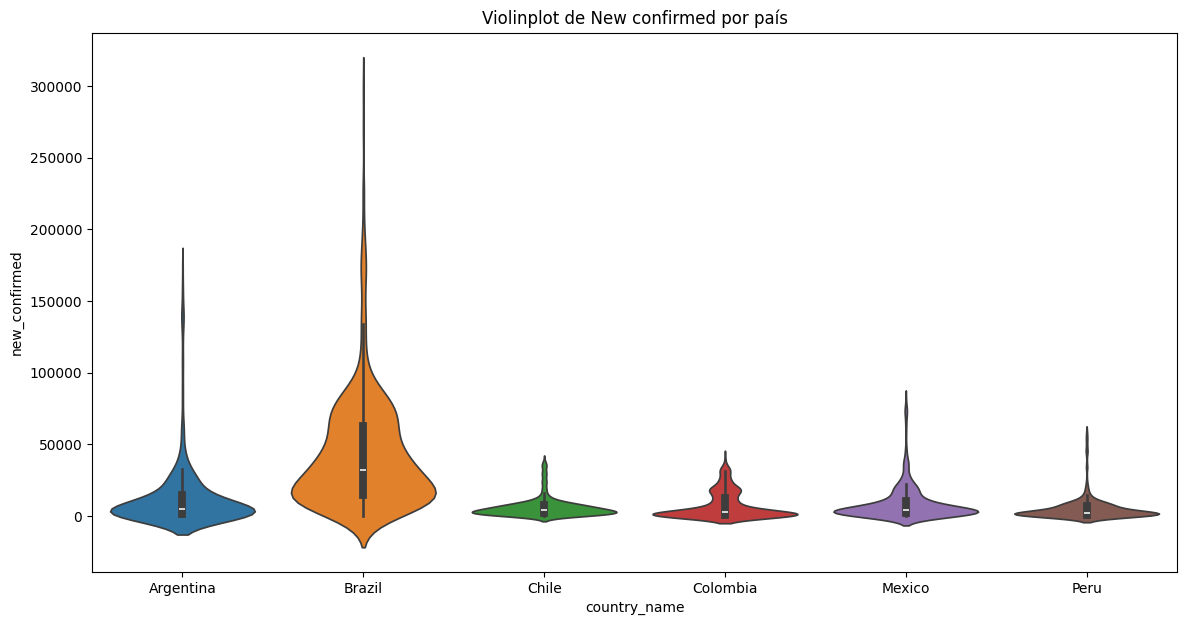

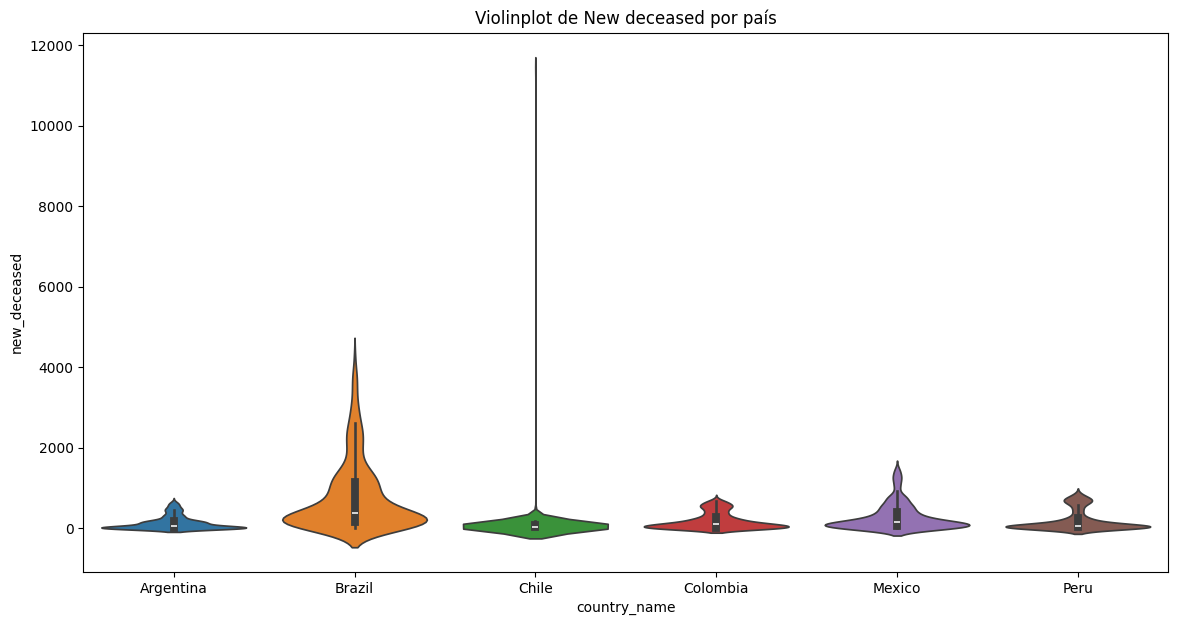

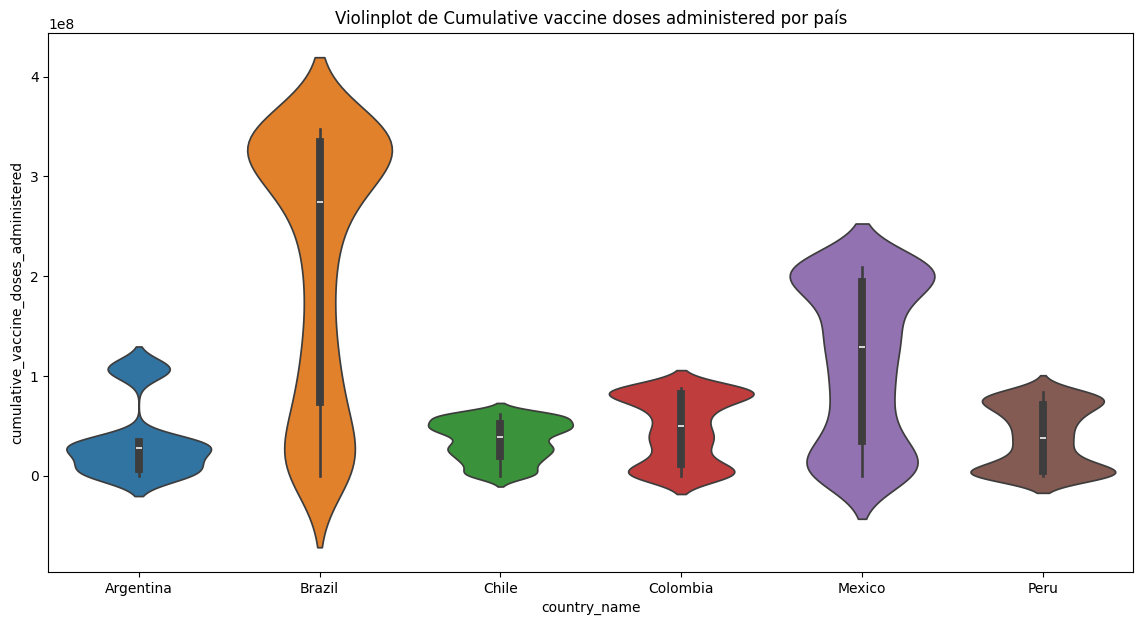

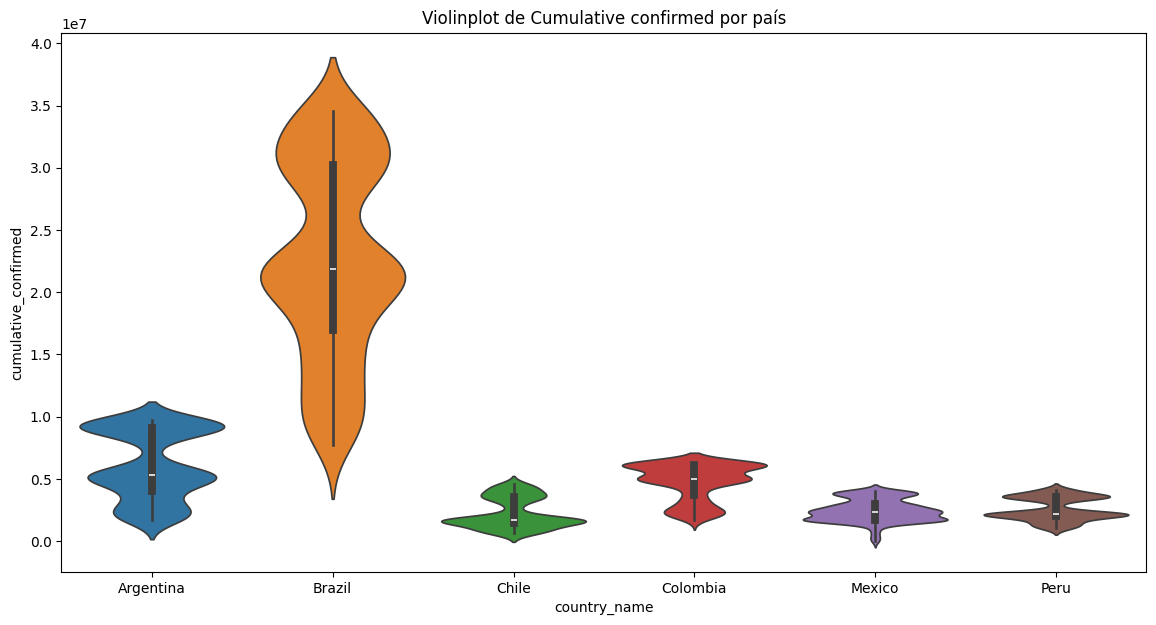

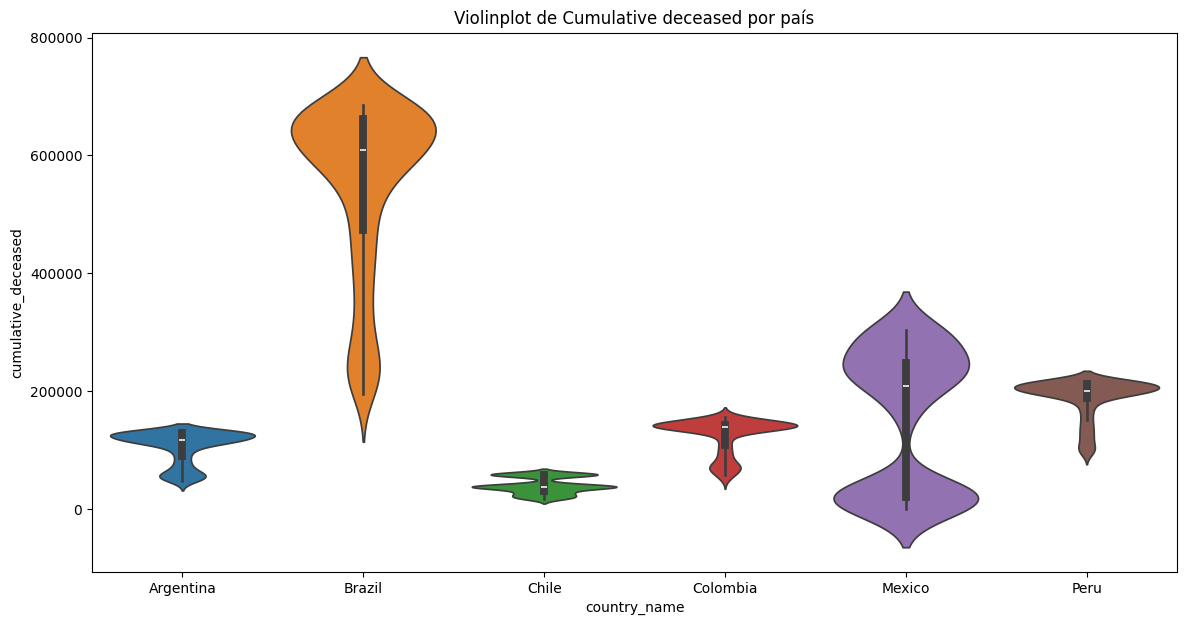

In [ ]:
#Se crea un bucle for que recorre una lista de columnas especificas con valores numericos que han mostrado tener un cambio y el cuerpo extrae los valores para
#  una grafico de violin y se compara entre paises

columnas = ['new_confirmed', 'new_deceased','cumulative_vaccine_doses_administered', 'cumulative_confirmed', 'cumulative_deceased' ]

for columna in columnas:
    fig, ax = plt.subplots(figsize=(14, 7))
    sns.violinplot(x='country_name', y=columna, data=paises_ordenados, ax=ax, hue='country_name')
    
    plt.title(f'Violinplot de {columna.replace("_", " ").capitalize()} por país')
    plt.show()


Distribución de la población por grupos de edad

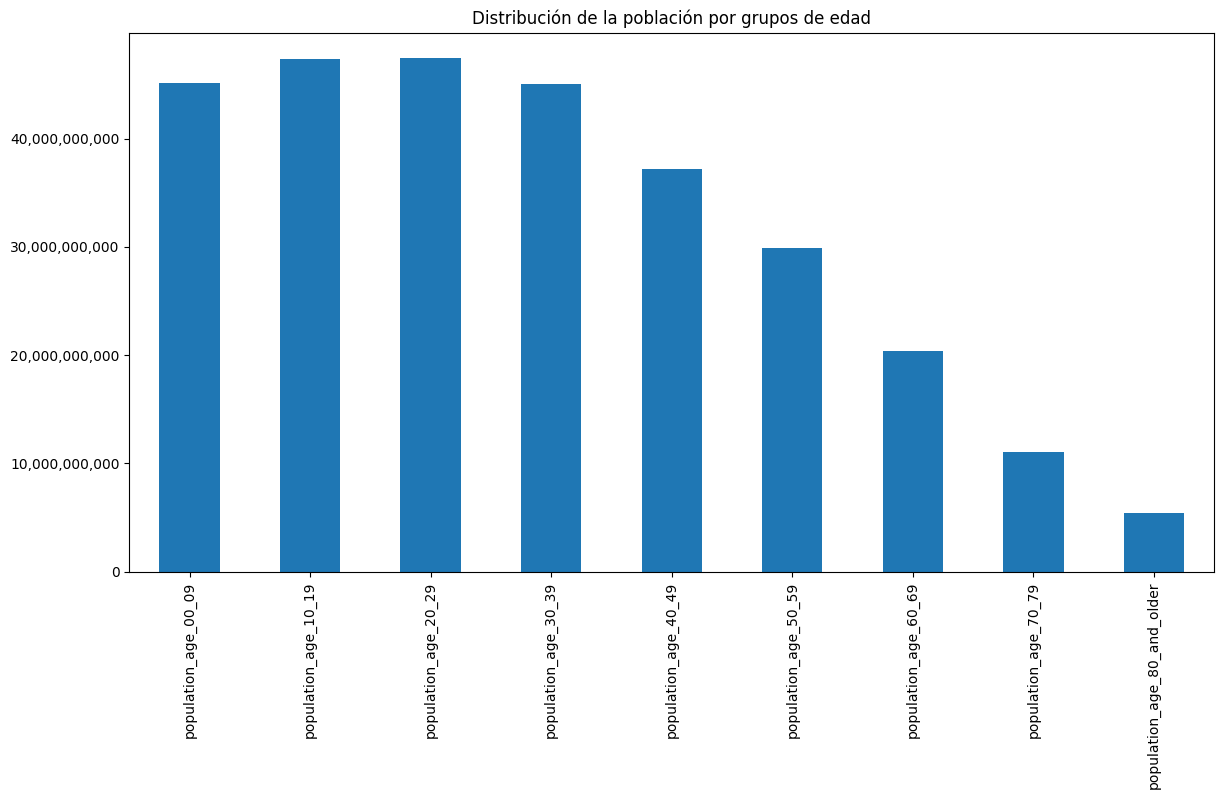

In [ ]:
#Se crea una grafica de distribucion que acumula las sumas de las columnas de edades, que se guarda en una variable, del dataset almacenadas en una lista 

edades = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 
          'population_age_60_69', 'population_age_70_79','population_age_80_and_older']

grupo_edad = paises_ordenados[edades].sum()

fig, ax = plt.subplots(figsize=(14, 7))
grupo_edad.plot(kind='bar', ax=ax)

plt.title('Distribución de la población por grupos de edad')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: format(int(x), ',')))
plt.show()

Diagrama de barras apilado de comparación de la tasa de mortalidad masculina vs. femenina por país

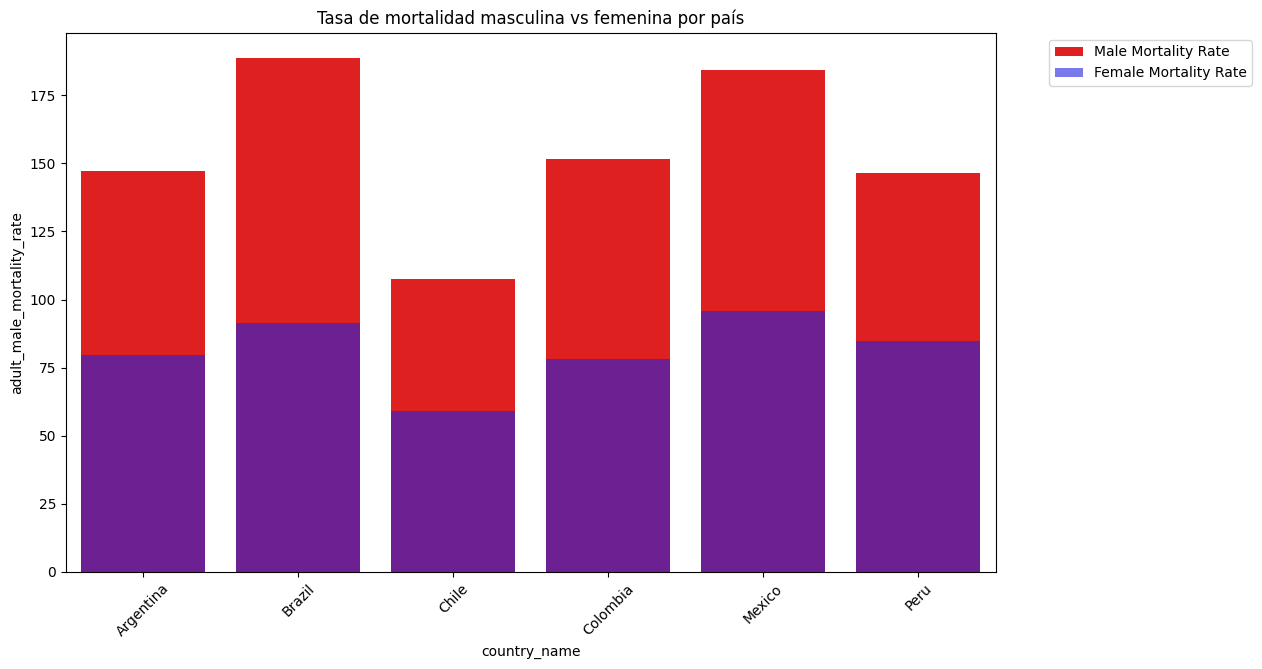

In [74]:
# Grafica de mortalidad por genero

plt.figure(figsize=(12, 7))
sns.barplot(data=paises_ordenados, x='country_name', y='adult_male_mortality_rate', color='red', label='Male Mortality Rate')
sns.barplot(data=paises_ordenados, x='country_name', y='adult_female_mortality_rate', color='blue', alpha=0.6, label='Female Mortality Rate')
plt.xticks(rotation=45)
plt.title('Tasa de mortalidad masculina vs femenina por país')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Matriz de correlación de indicadores demográficos y de salud

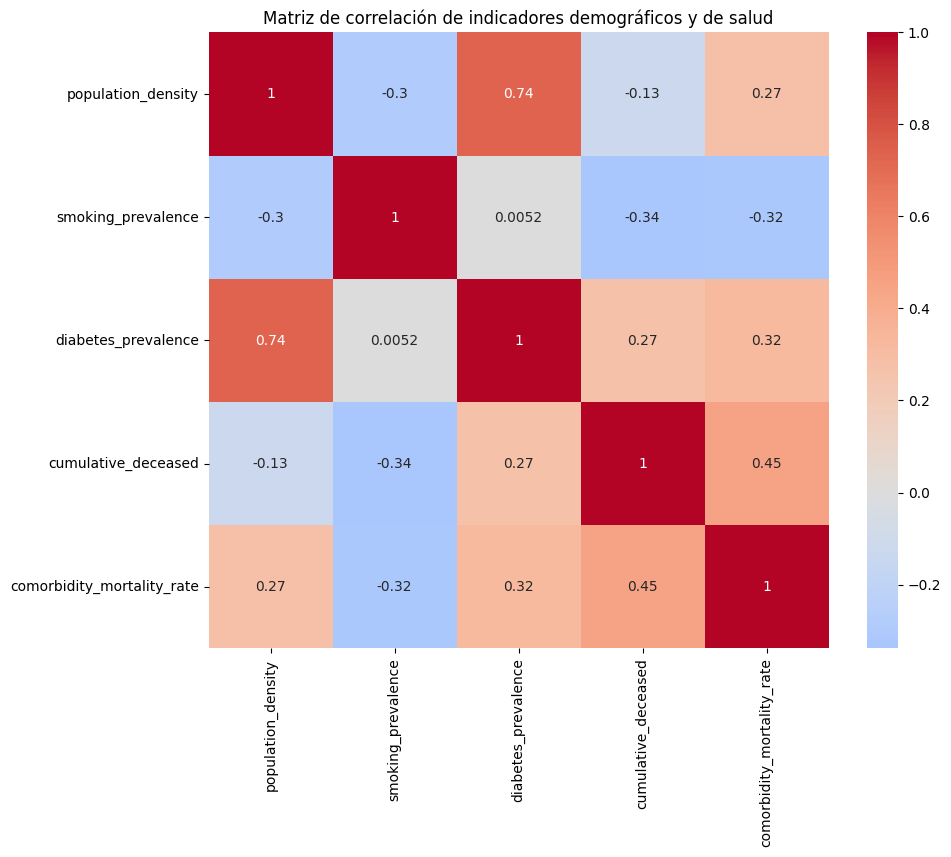

In [77]:
#Se crea una matriz de correlacion a traves de una lista de las columnas que tienen datos de salud y poblacion 

columnas = ['population_density', 'smoking_prevalence', 'diabetes_prevalence', 'cumulative_deceased', 'comorbidity_mortality_rate']
correlacion = paises_ordenados[columnas].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación de indicadores demográficos y de salud')
plt.show()

Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad.

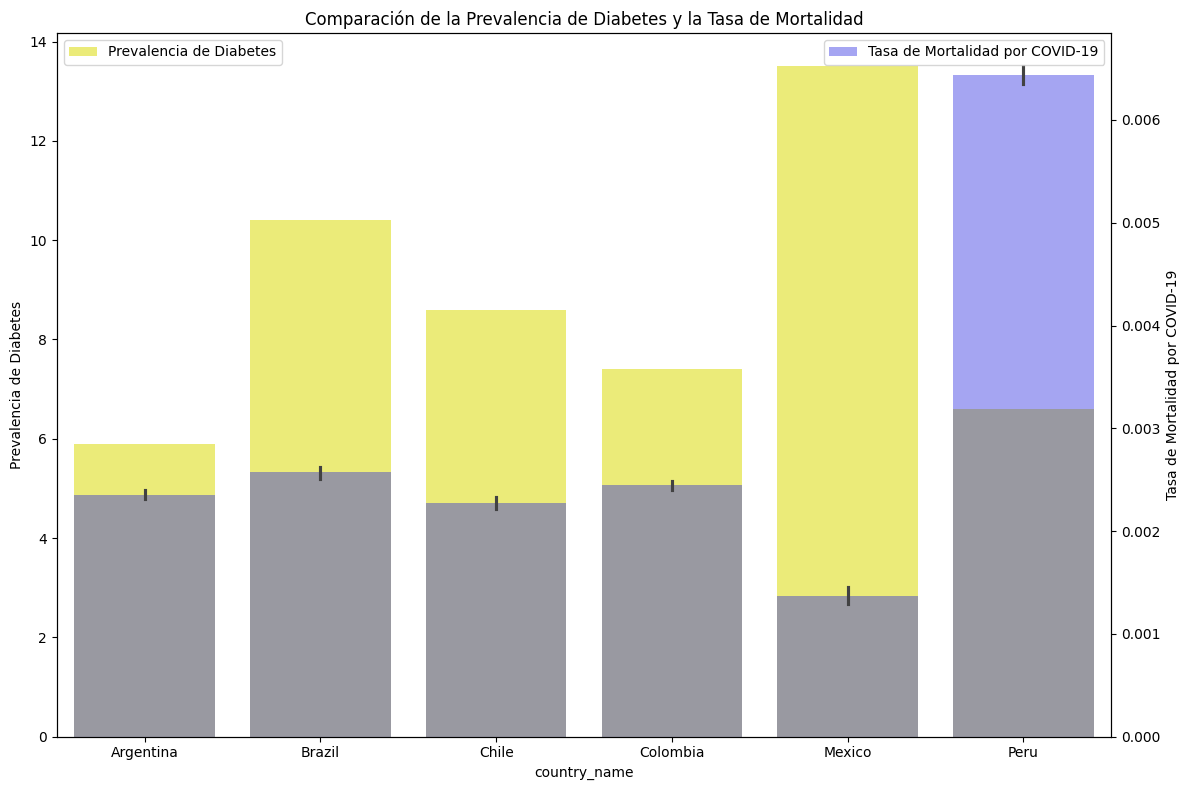

In [ ]:
#Se crea la grafica de barras que muestra la tasa de mortalidad (muertes acumuladas entre el totalidad de la  poblacion) y otro segmento muestra las cifras 
# de diabates dividido por pais


fig, ax = plt.subplots(1, 1, figsize=(12, 8))

sns.barplot(data=paises_ordenados, 
            x= paises_ordenados['country_name'], 
            y= paises_ordenados['diabetes_prevalence'], 
            color='yellow', 
            label='Prevalencia de Diabetes',
            ax=ax,
            alpha=0.6
)

ax2 = ax.twinx()

sns.barplot(data=paises_ordenados, 
            x= paises_ordenados['country_name'], 
            y= paises_ordenados['cumulative_deceased'] / paises_ordenados['population'],
            color='Blue', 
            label='Tasa de Mortalidad por COVID-19', 
            ax=ax2,
            alpha=0.4)

plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de Diabetes')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
plt.title('Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad')
plt.tight_layout()
plt.show()

Tercer avance

In [93]:
#Se formatea la fecha que hasta ahora es una columna unica para descomponerla en columnas divididas de semana, mes y año para algunas graficas

paises_ordenados['week'] = paises_ordenados.index.isocalendar().week
paises_ordenados['month'] = paises_ordenados.index.month
paises_ordenados['year'] = paises_ordenados.index.isocalendar().year

Evolución de Casos Activos vs. Recuperados

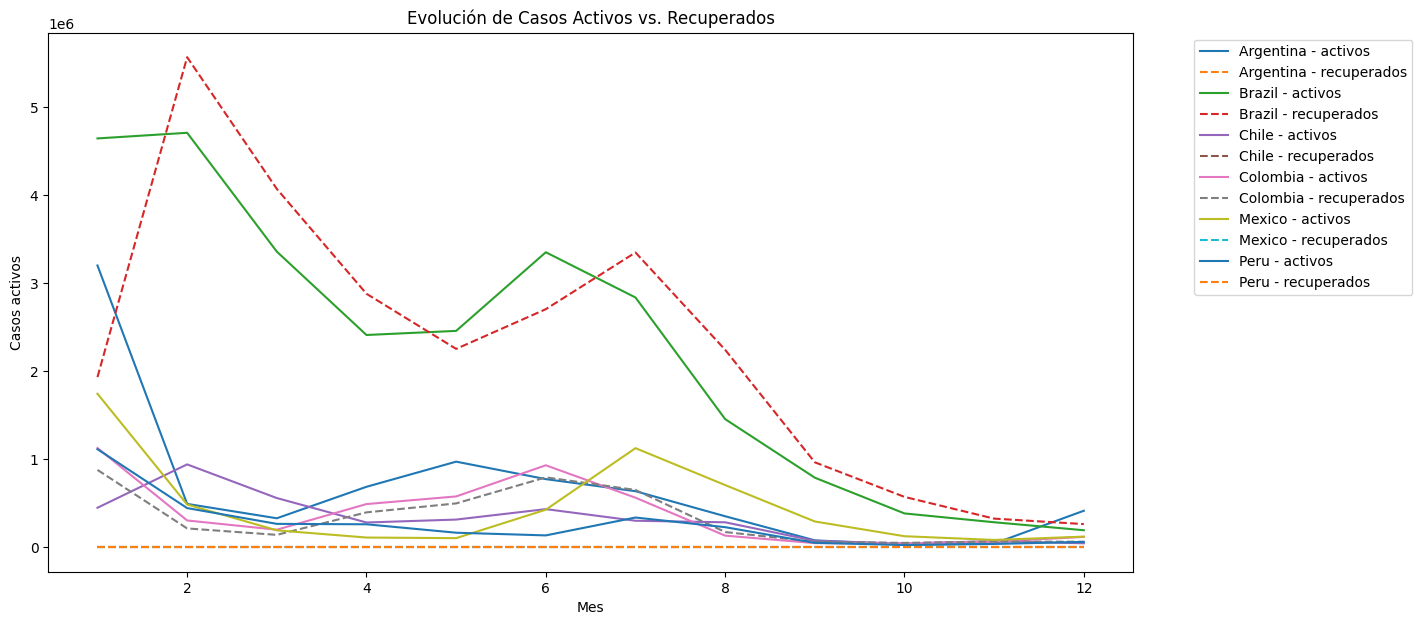

In [113]:
#Se crea una grafica de lineas que compara los casos activos(linea continua) contra los casos recuperados(linea discuntinua) con diferencia de colores por 
# pais. Se creo una variable que almacena el agrupamiento de las columnas de casos confirmados y recuperados para sumarlos respectivamente. Se usa un bucle
# # for que itera sobre la variable mencionada para buscar la columna paais (que fue incluida al crear la variable) y el cuerpo recolecta los casos activos y
# recuperados por pais


casos = paises_ordenados.groupby(['country_name', 'month'])[['new_confirmed', 'new_recovered']].sum().reset_index()

plt.figure(figsize=(14, 7))
for caso in casos['country_name'].unique():
    casos_pais = casos[casos['country_name'] == caso]
    plt.plot(casos_pais['month'], casos_pais['new_confirmed'], label=f'{caso} - activos')
    plt.plot(casos_pais['month'], casos_pais['new_recovered'], label=f'{caso} - recuperados', linestyle='--')

plt.xlabel('Mes')
plt.ylabel('Casos activos')
plt.title('Evolución de Casos Activos vs. Recuperados')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Relación entre la Cobertura de Vacunación y la Reducción de Casos

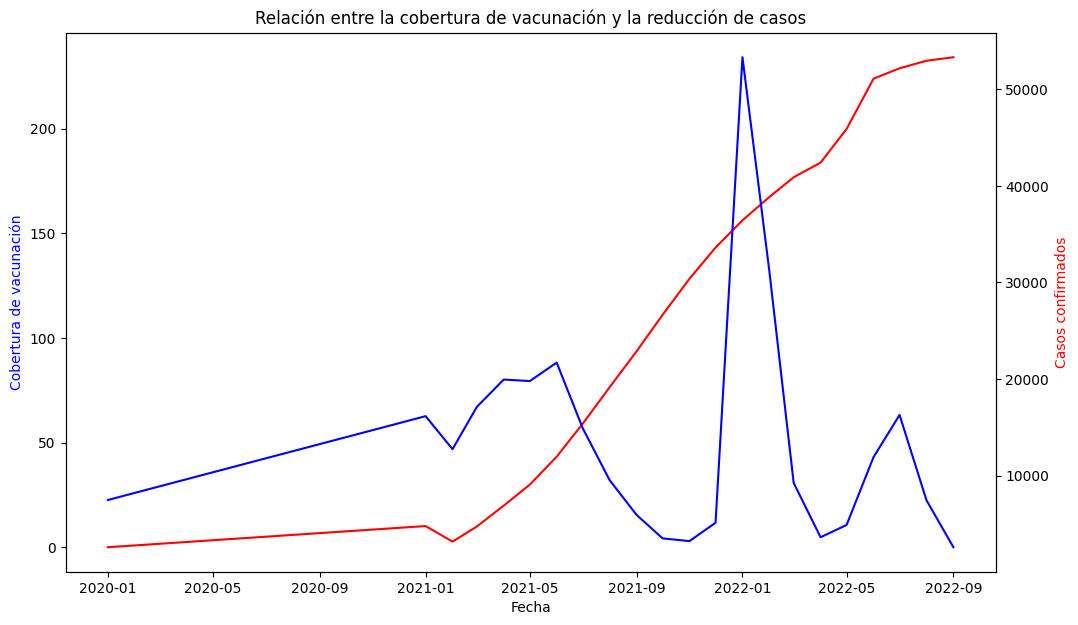

In [119]:
# Se crea una grafica de 2 lineas, una acumula el porcentaje de vacunacion y otra de la reduccion. Se crea una columna que almacena el porcentaje de vacunacion
# junto con una variable creada que agrupa tanto la cobertura de vacunacion y los casos acumulados. Esa variable se formatea su fecha para mejor manejo.
# Con las columnas y variables creadas se crean las lineas de las graficas

paises_ordenados['vaccines_coverage'] = paises_ordenados['cumulative_vaccine_doses_administered'] / paises_ordenados['population'] * 100

vacunacion = paises_ordenados.groupby(['year', 'month'])[['vaccines_coverage', 'new_confirmed']].mean().reset_index()

vacunacion['date'] = pd.to_datetime(vacunacion[['year', 'month']].assign(day=1))

fig, ax1 = plt.subplots(figsize=(12, 7))
ax2 = ax1.twinx()
ax1.plot(vacunacion['date'], vacunacion['vaccines_coverage'], 'r-')
ax2.plot(vacunacion['date'], vacunacion['new_confirmed'], 'b-')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Cobertura de vacunación', color='b')
ax2.set_ylabel('Casos confirmados', color='r')

plt.title('Relación entre la cobertura de vacunación y la reducción de casos')
plt.show()

Progreso de la vacunación por país

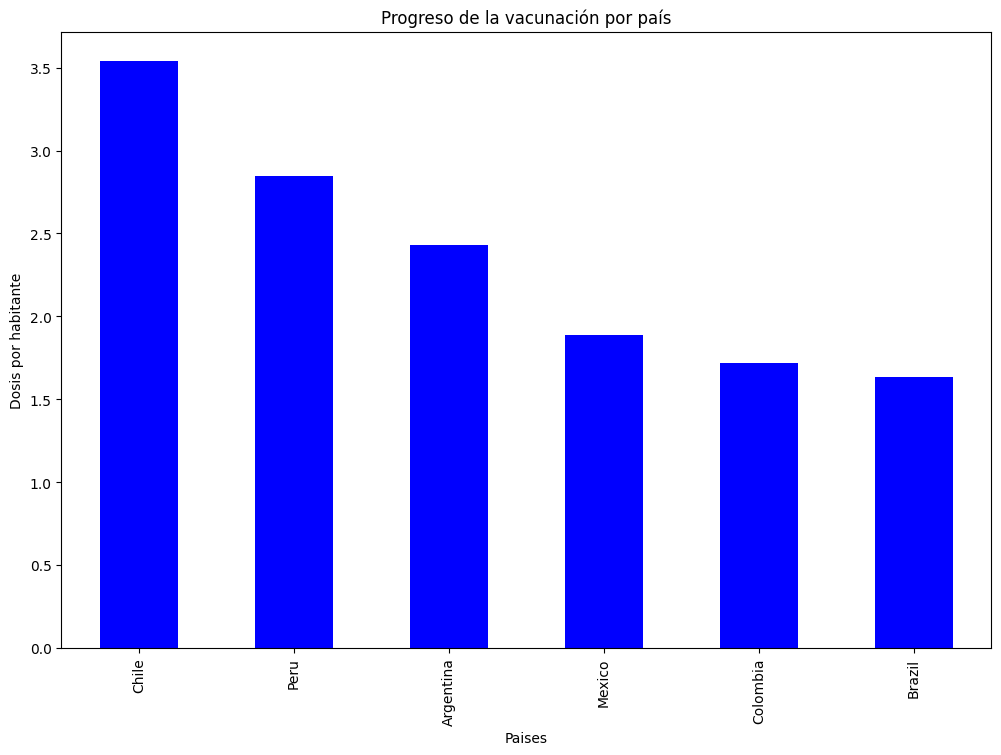

In [123]:
#Se crea una grafica de barras que muestra el promedio de vacunacion de cada pais. Se crea una variable que agrupa los acumulados de vacunacion para obtener
# su promedio al dividirlo entre la poblacion y se ordena de forma descendiente 

vacunacion = paises_ordenados.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / paises_ordenados.groupby('country_name')['population'].mean()
vacunacion.sort_values(ascending=False).plot(kind='bar', figsize=(12, 8), color='blue')

plt.xlabel('Paises')
plt.ylabel('Dosis por habitante')
plt.title('Progreso de la vacunación por país')
plt.show()

Nuevos casos y temperatura promedio

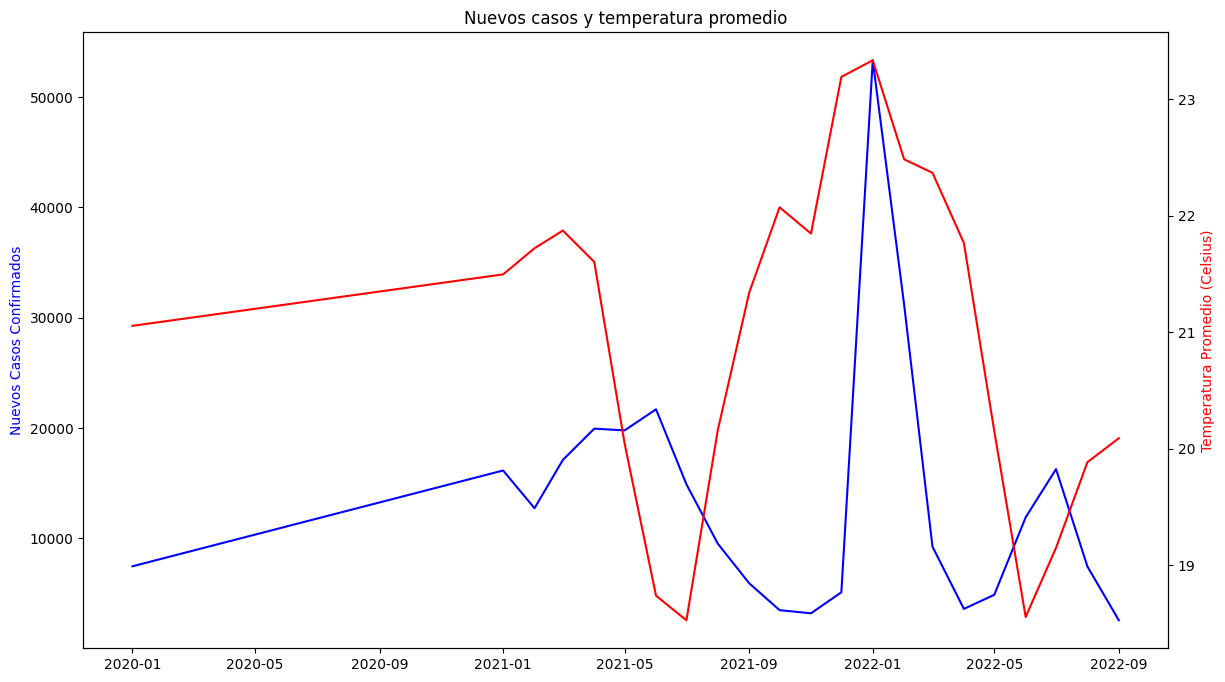

In [127]:
#Se crea una grafica de dos lineas que agrupa los casos confrimados y la tempratura promedios para compararlos entre si. Se creo una variable que agrupa
# ambas caolumnas y obtiene sus promedios. Se formatea la fecha en la columna de fecha de esa variable, y con las variables y columnas construidas se 
# grafican las lineas

cases_temperatura = paises_ordenados.groupby(['year', 'month'])[['new_confirmed', 'average_temperature_celsius']].mean().reset_index()

cases_temperatura['date'] = pd.to_datetime(cases_temperatura[['year', 'month']].assign(day=1))

fig, ax1 = plt.subplots(figsize=(14, 8))
ax2 = ax1.twinx()
ax1.plot(cases_temperatura['date'], cases_temperatura['new_confirmed'], 'b-')
ax2.plot(cases_temperatura['date'], cases_temperatura['average_temperature_celsius'], 'r-')
ax1.set_ylabel('Nuevos Casos Confirmados', color='b')
ax2.set_ylabel('Temperatura Promedio (Celsius)', color='r')
plt.title('Nuevos casos y temperatura promedio')
plt.show()


Impacto de la Urbanización en la Propagación del Covid-19

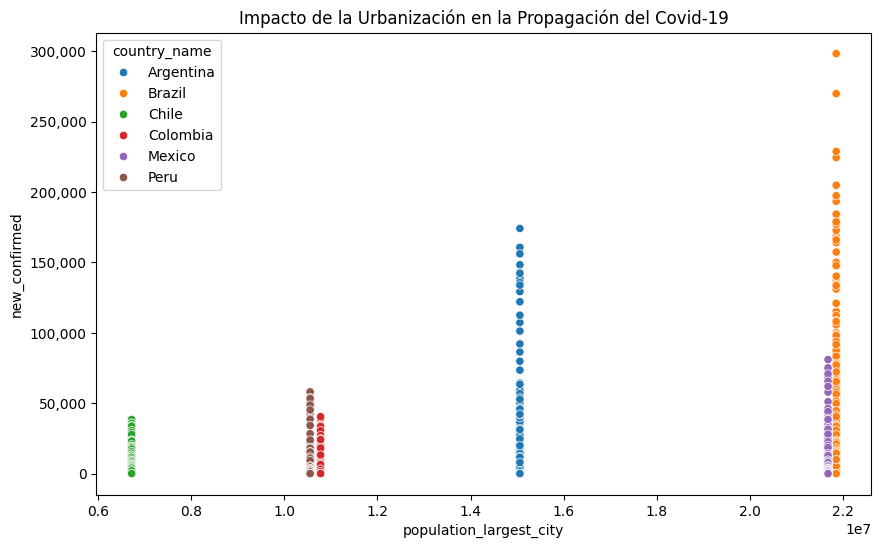

In [ ]:
#Se crea una grafica des dispersion que muestra la relacion entre la poblacion de grandes ciudades y sus cifras de casos 

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='population_largest_city', y='new_confirmed', data=paises_ordenados, hue='country_name')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: format(int(x), ',')))
plt.title('Impacto de la Urbanización en la Propagación del Covid-19')
plt.show()

Distribución de la Población por Edad en Países

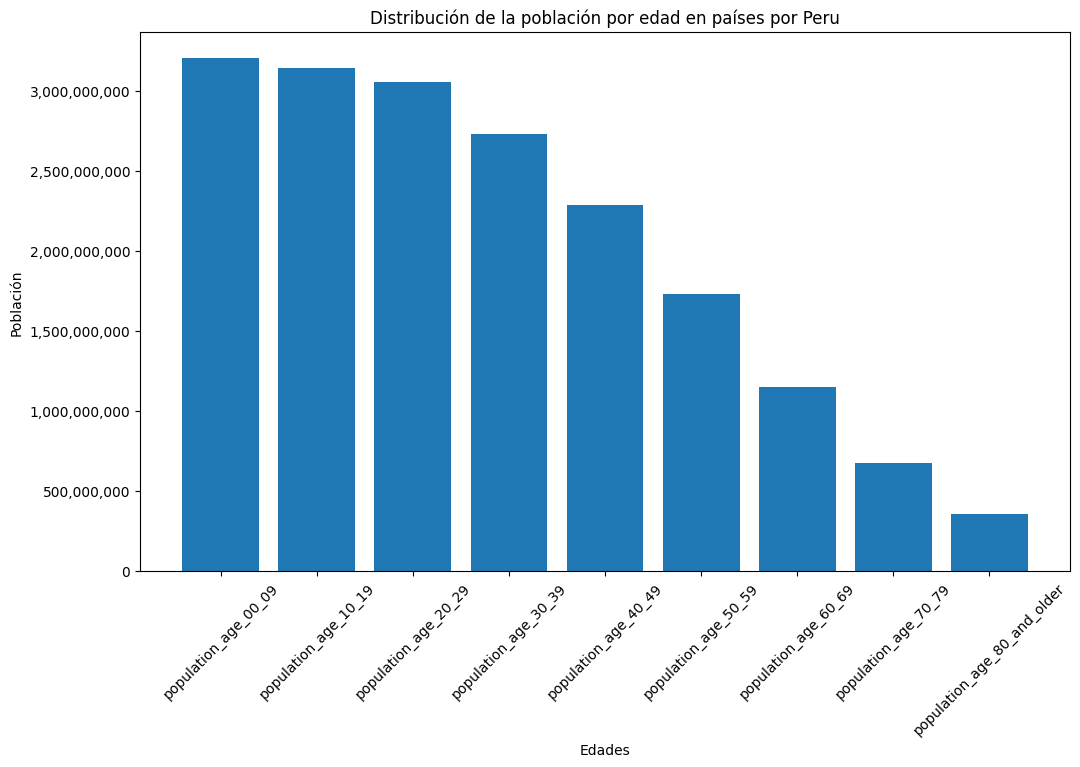

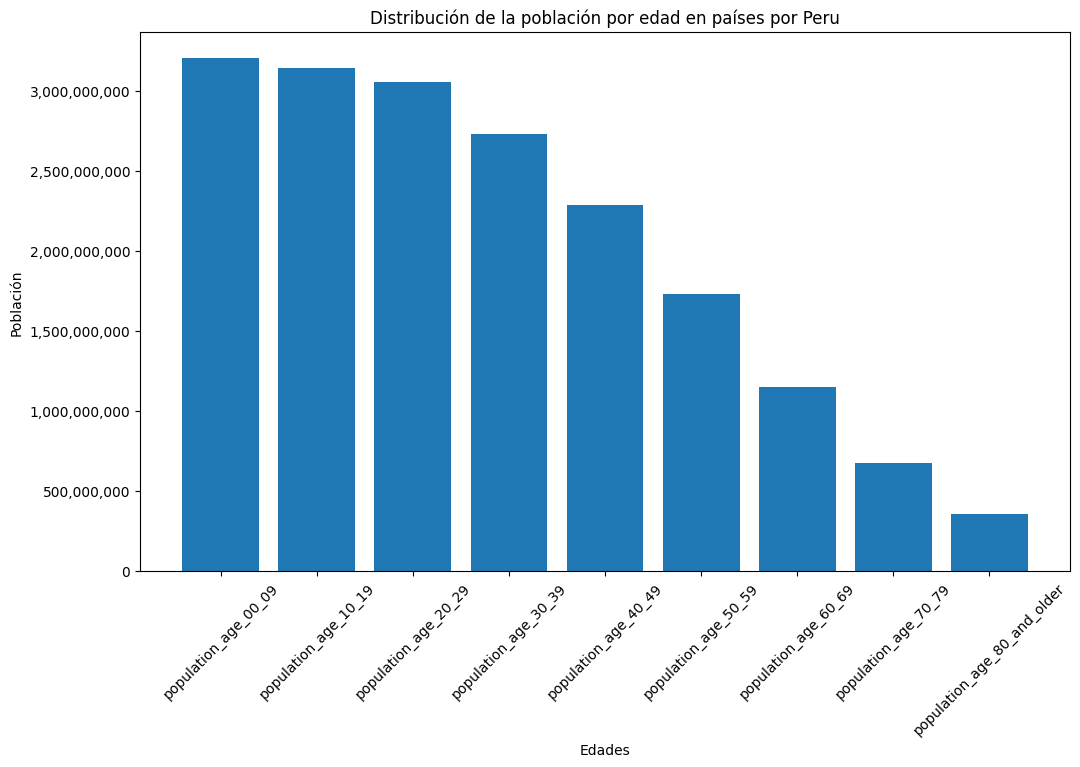

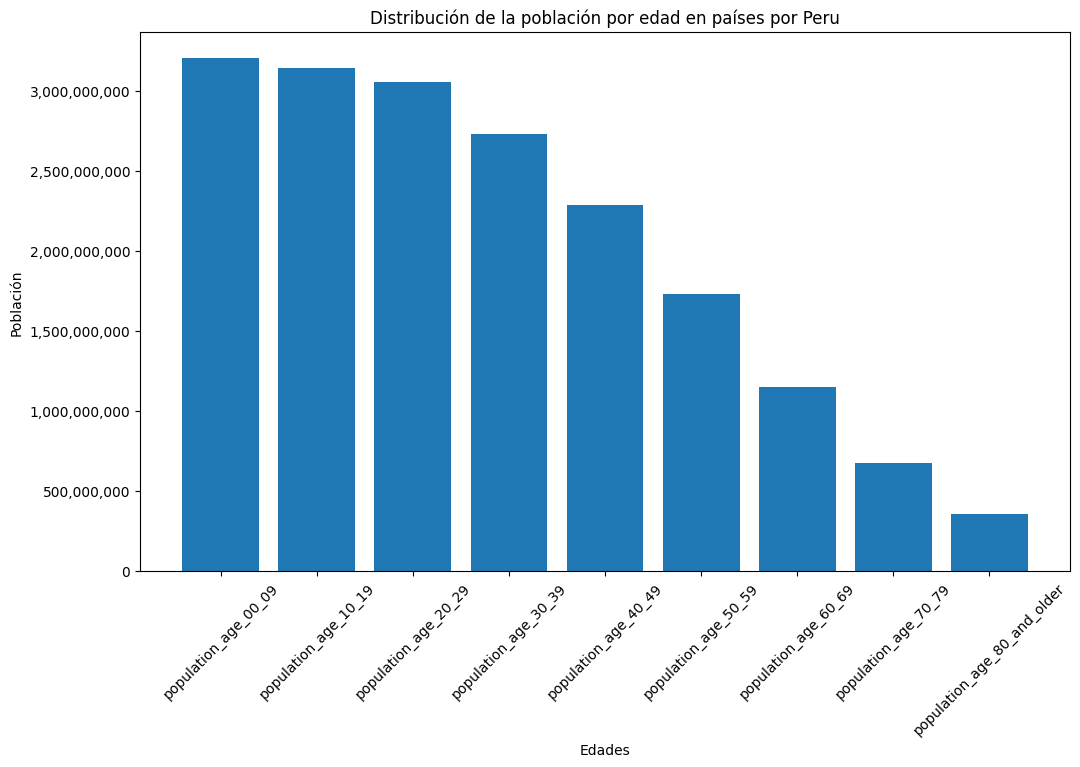

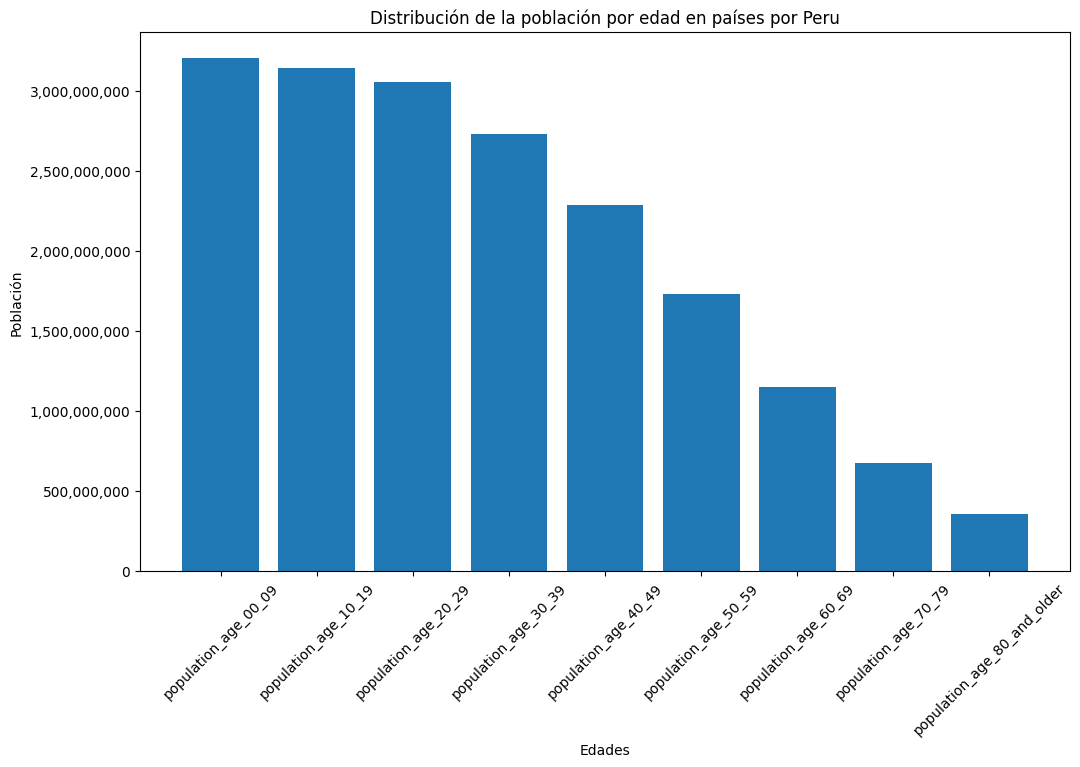

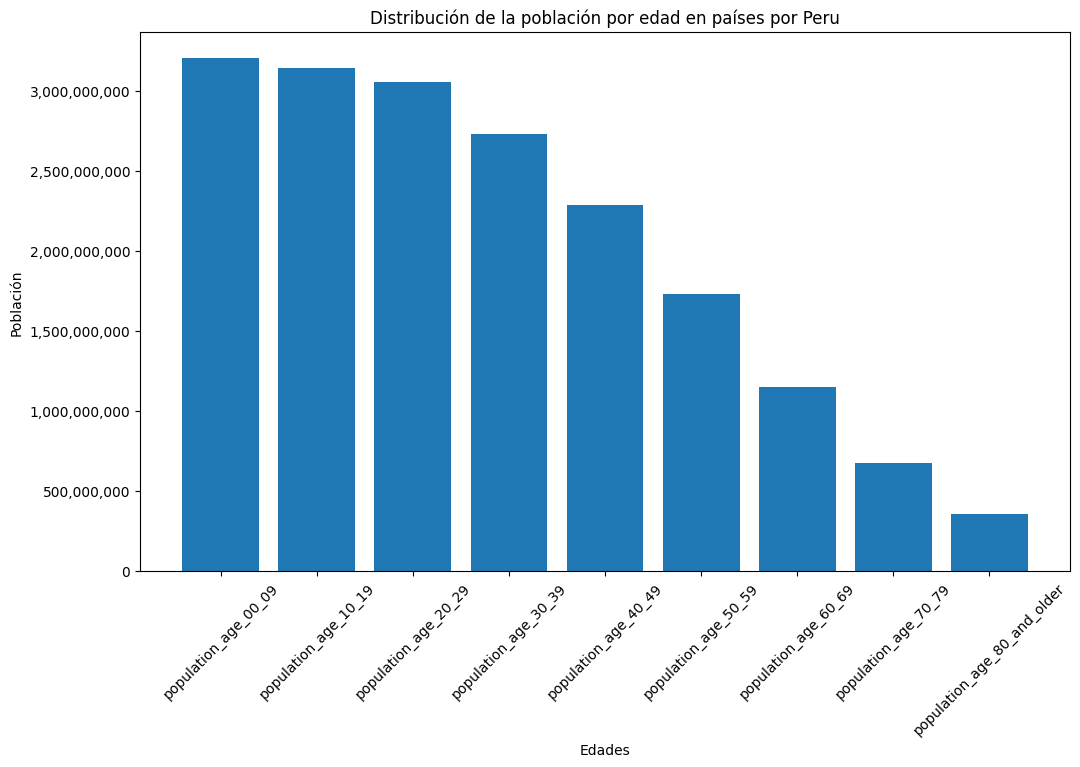

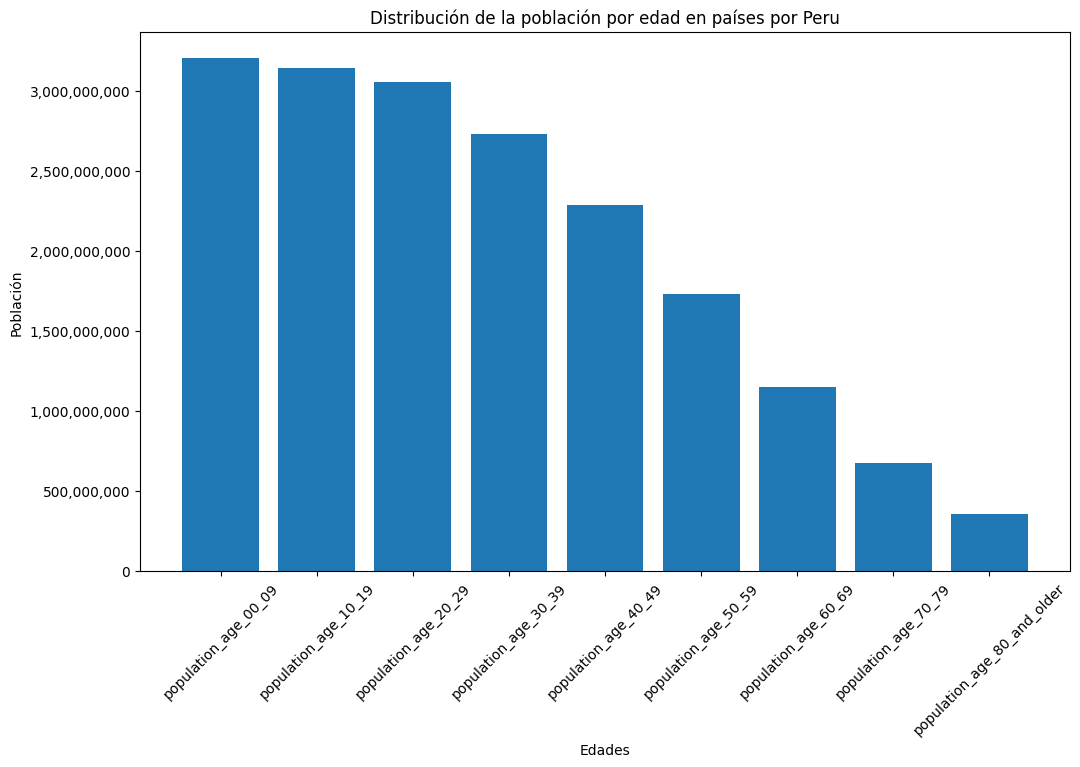

In [155]:
#Se crean las graficas de barras que agrupan los segmentos de edades por pais. Por medio de un bucle for se itera sobre una variable que agrupan y suman la
# poblacion de los segmentos de edades, que a su vez fueron obtenidos de una lista de columnas del dataset general. El cuerpo del bucle itera sobre cada 
# pais para obtener la poblacion de las edades y construye las graficas

edades = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 
          'population_age_50_59', 'population_age_60_69', 'population_age_70_79','population_age_80_and_older']

grupo_edad = paises_ordenados.groupby('country_name')[edades].sum().reset_index()

for edad in grupo_edad['country_name'].unique():
    pais_edades = grupo_edad[grupo_edad['country_name'] == country]
    fig, ax = plt.subplots(figsize=(12, 7))
    paisedades_orden = country_data.melt(id_vars='country_name', value_vars=edades, var_name='age_group', value_name='population')
    ax.bar(paisedades_orden['age_group'], paisedades_orden['population'])
    ax.set_title(f'Distribución de la población por edad en países por {country}')
    ax.set_xlabel('Edades')
    ax.set_ylabel('Población')
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: format(int(x), ',')))
    plt.xticks(rotation=45)
    plt.show()

Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad

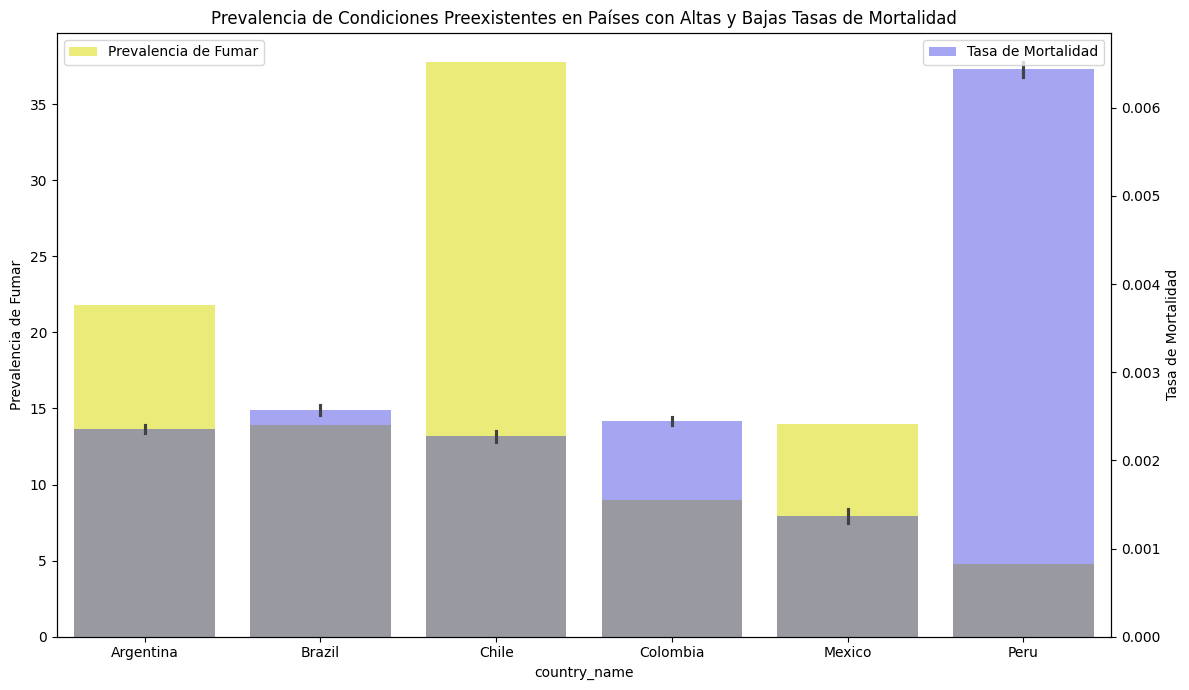

In [157]:
#Se grafica la comparacion de tabaquismo y la mortalidad del dataset (muertes acumuladas entre el totalidad de la  poblacion) y otro segmento muestra las cifras 
# de diabates dividido por pais

fig, ax = plt.subplots(1, 1, figsize=(12, 7))

sns.barplot(data=paises_ordenados, 
            x= paises_ordenados['country_name'], 
            y= paises_ordenados['smoking_prevalence'], 
            color='yellow', 
            label='Prevalencia de Fumar',
            ax=ax,
            alpha=0.6)

ax2 = ax.twinx()

sns.barplot(data=paises_ordenados, 
            x= paises_ordenados['country_name'], 
            y= paises_ordenados['cumulative_deceased'] / paises_ordenados['population'], 
            color='Blue', 
            label='Tasa de Mortalidad', 
            ax=ax2,
            alpha=0.4)

plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de Fumar')
ax2.set_ylabel('Tasa de Mortalidad')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad')
plt.tight_layout()
plt.show()

Evolución Semanal de Casos Nuevos

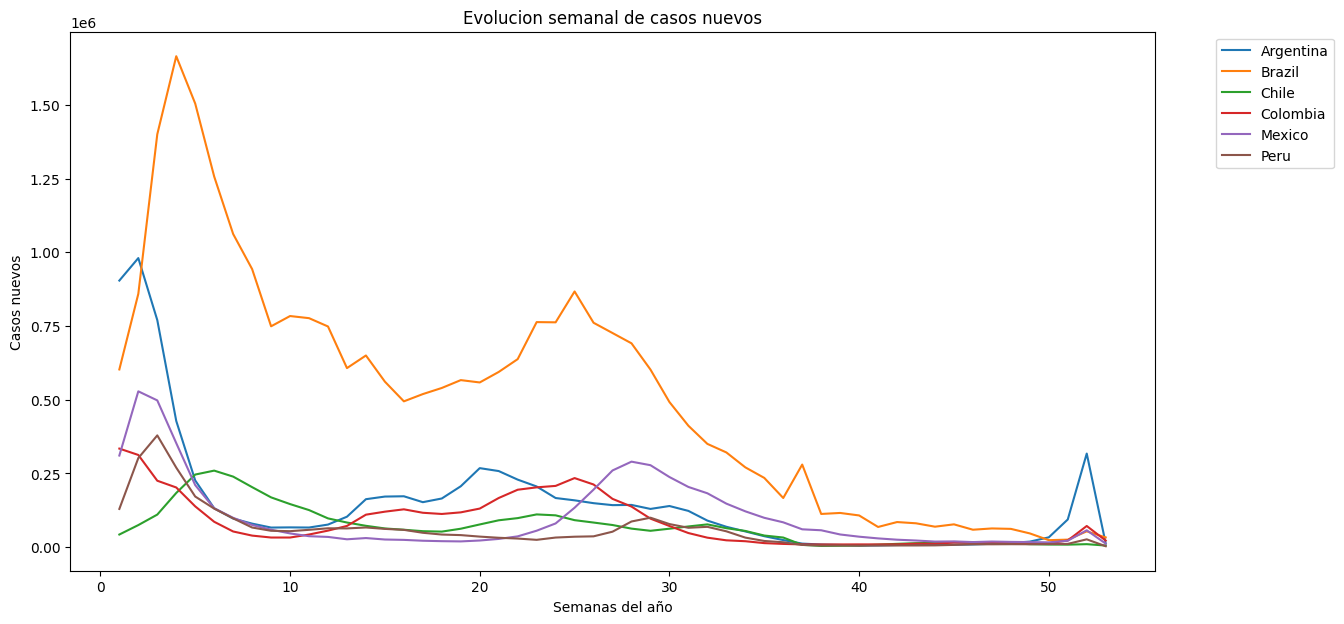

In [164]:
#Se crea una grafica que muestra la cantidad de casos nuevos por semana de cada pais. Para hacerla se crearon dos nuevas columnas que almacenan las fechas
# por semanas. Se almacenba en una variable el calculo de los nuevos casos por semana y se agrupan entre la misma. Se usa un bucle for que recorre cada pais
# el cuerpo del ciclo extrae los casos y las semanas de cada uno

paises_ordenados['week'] = paises_ordenados.index.isocalendar().week

semana = paises_ordenados.groupby(['country_name', 'week'])['new_confirmed'].sum().reset_index()

plt.figure(figsize=(14, 7))
for pais in semana['country_name'].unique():
    casos_semana_pais = semana[semana['country_name']== pais]
    plt.plot(casos_semana_pais['week'], casos_semana_pais['new_confirmed'], label= pais)
plt.xlabel('Semanas del año')
plt.ylabel('Casos nuevos')
plt.title('Evolucion semanal de casos nuevos')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Variación Mensual de Muertes

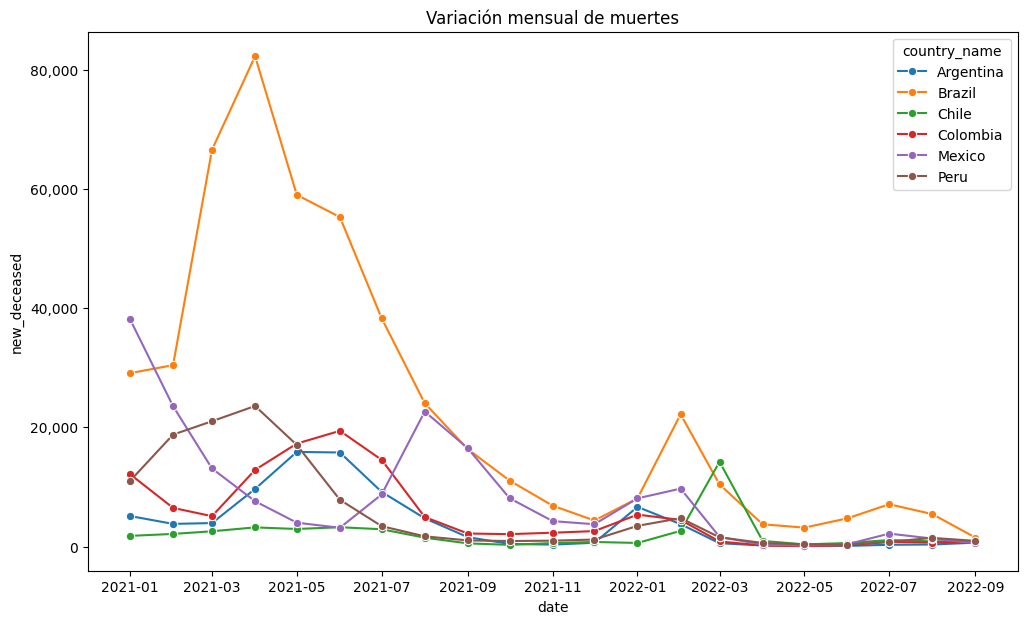

In [167]:
#Se crea una grafica de lineas que muestra la variacion mensual de las muertes. Se almecena en una variable el agrupamiento de los decesos y se formatea por
# mes. Con esoa datos se conatruye la grafica

casos_mes = paises_ordenados.groupby([paises_ordenados.index.to_period('M'), 'country_name'])['new_deceased'].sum().reset_index()
casos_mes['date'] = casos_mes['date'].dt.to_timestamp()

fig, ax = plt.subplots(figsize=(12, 7))
sns.lineplot(x='date', y='new_deceased', hue='country_name', data=casos_mes, marker='o', ax=ax)

plt.title('Variación mensual de muertes')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: format(int(x), ',')))
plt.show()

Análisis Temporal de la Mortalidad

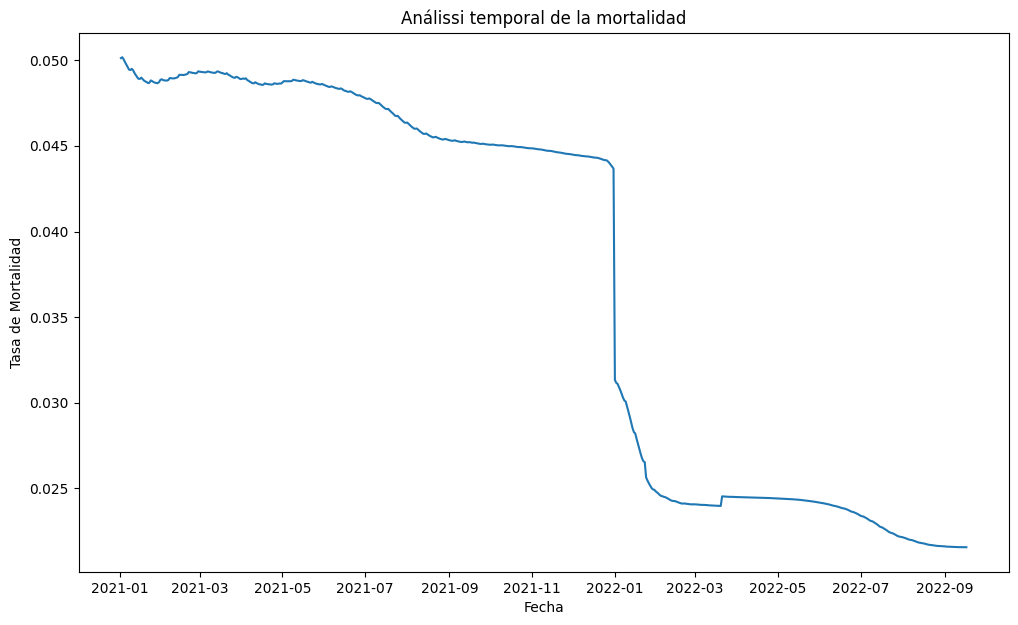

In [ ]:
#Se crea una grafica de liena que muestra la temporalidad de la mortalidad de todos los paises juntos. Se crea una nueva columna en el data set que calcula
# la mortalidad que se una para estimarla en la grafica 

paises_ordenados['mortality_rate'] = paises_ordenados['cumulative_deceased'] / paises_ordenados['cumulative_confirmed']
plt.figure(figsize=(12, 7))
sns.lineplot(data=paises_ordenados, x='date', y='mortality_rate', estimator='mean', errorbar=None)
plt.title('Análissi temporal de la mortalidad')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Mortalidad')
plt.show()

Para la consigna del avance 4 se crea el archivo con el dataset mas filtrado y ordenado hasta ahora

In [9]:
paises_ordenados.to_csv('DatosFinalesFiltrado.csv', index=False)